# Model Training with Synthetic Data - Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns

from utils import get_predictions, make_confusion_matrix, AUROC, plot_roc, make_barplot

In [2]:
with open("../../classes.txt") as f:
    classes = f.read().splitlines()
pandas_query = [f'Prob_{c}' for c in classes]
model_names = ['R_r1', 'R1800S_r1', 'R3600S_r1', 'RB_r1', 'R_r2', 'R1800S_r2', 'R3600S_r2', 'RB_r2', 'RBProxy', 'S']

# Analyse the full test set

## Get predictions for all trained models

In [3]:
all_csvs = [path for path in os.listdir('.') if path.endswith('.csv')]
model_dfs = [get_predictions(m + '.csv', classes=pandas_query) for m in model_names]
preds_dict = {k: v for k, v in zip(model_names, model_dfs)}

## Plot confusion matrices for all models 

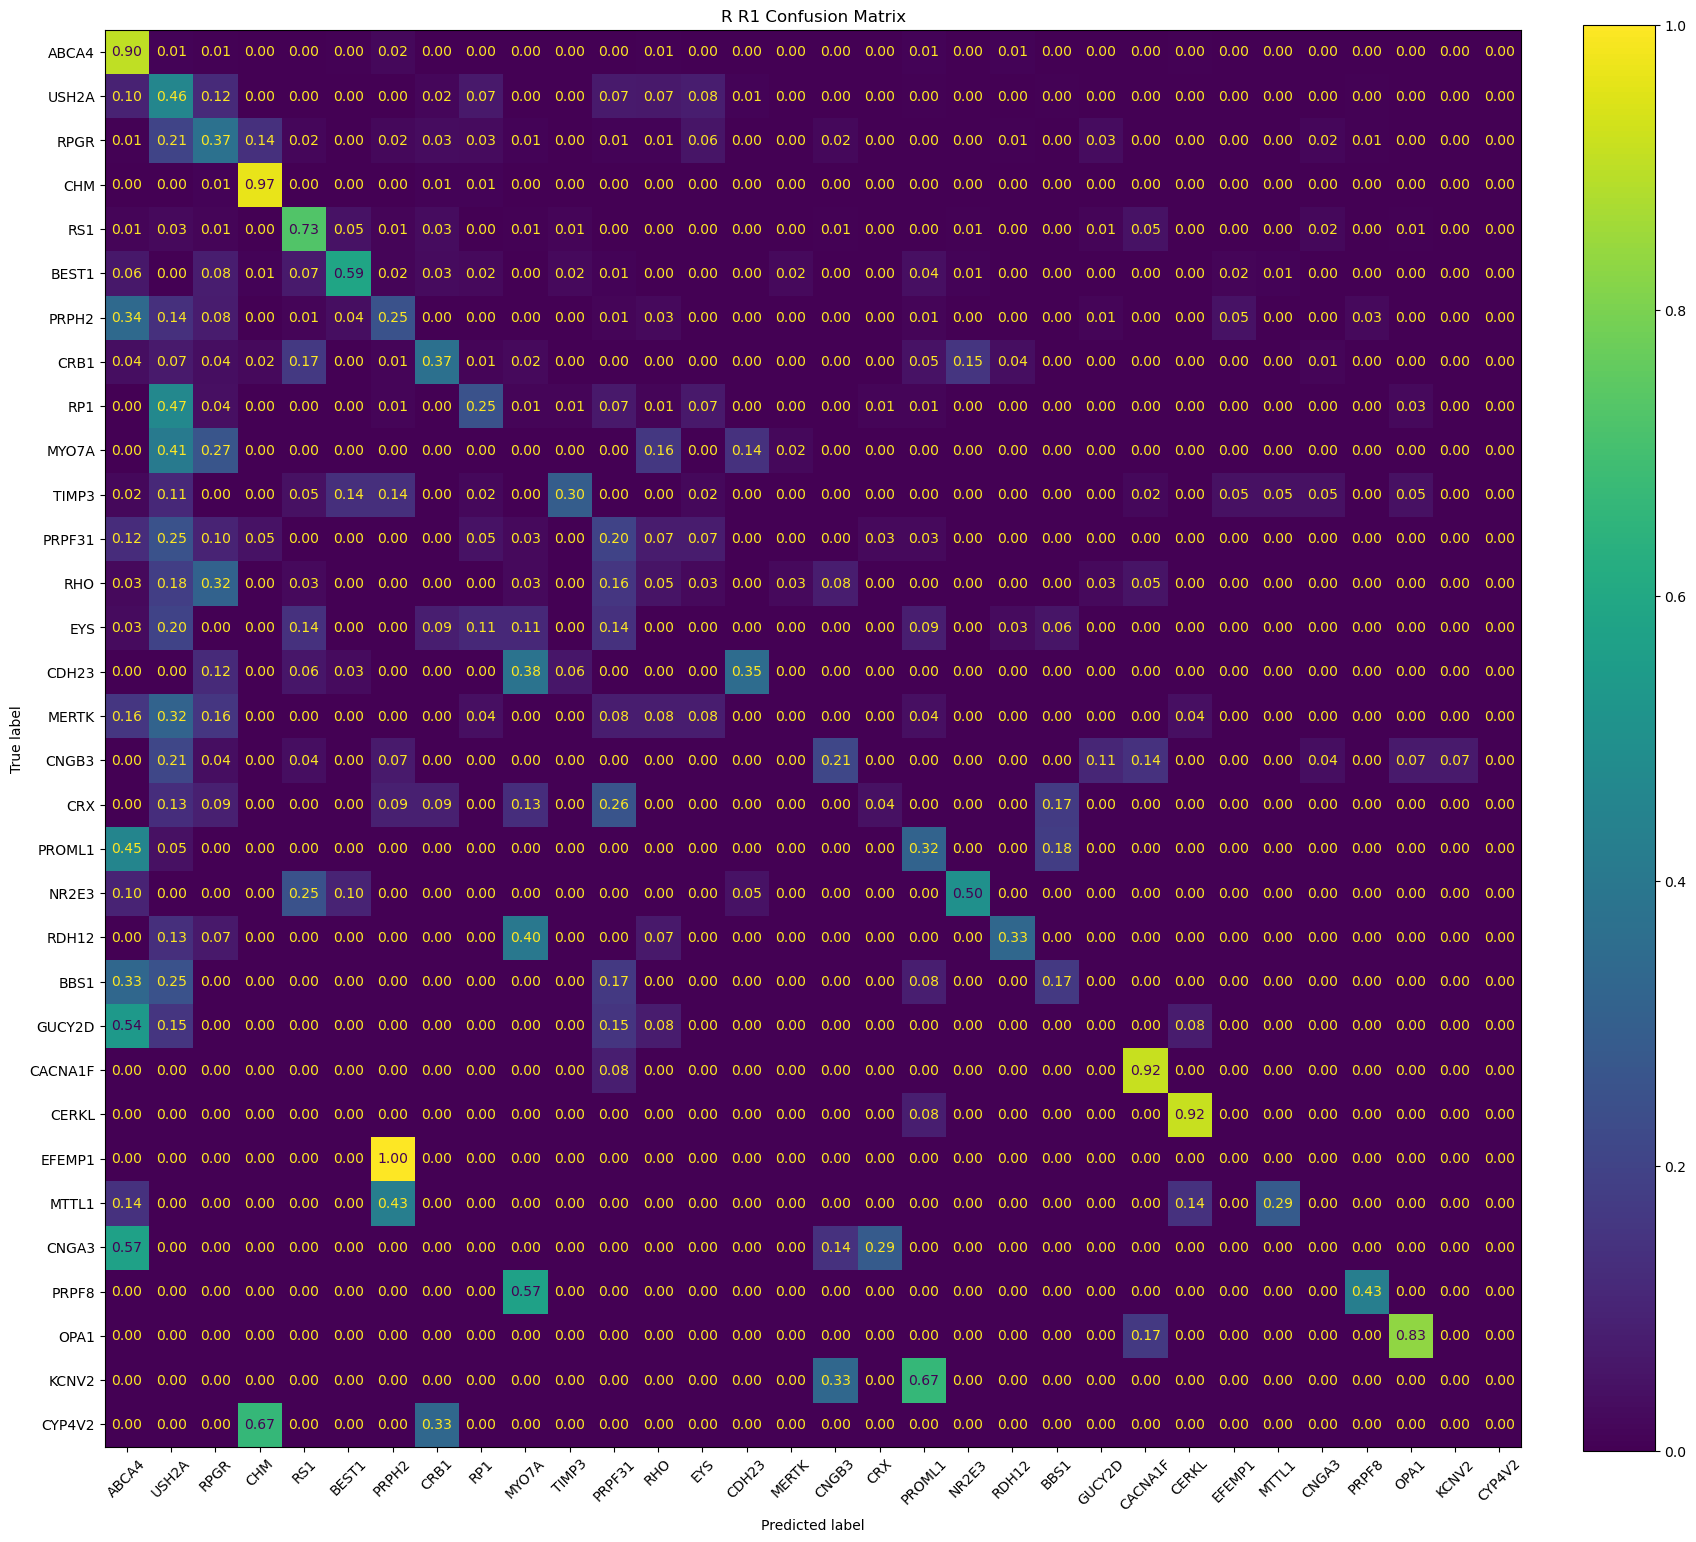

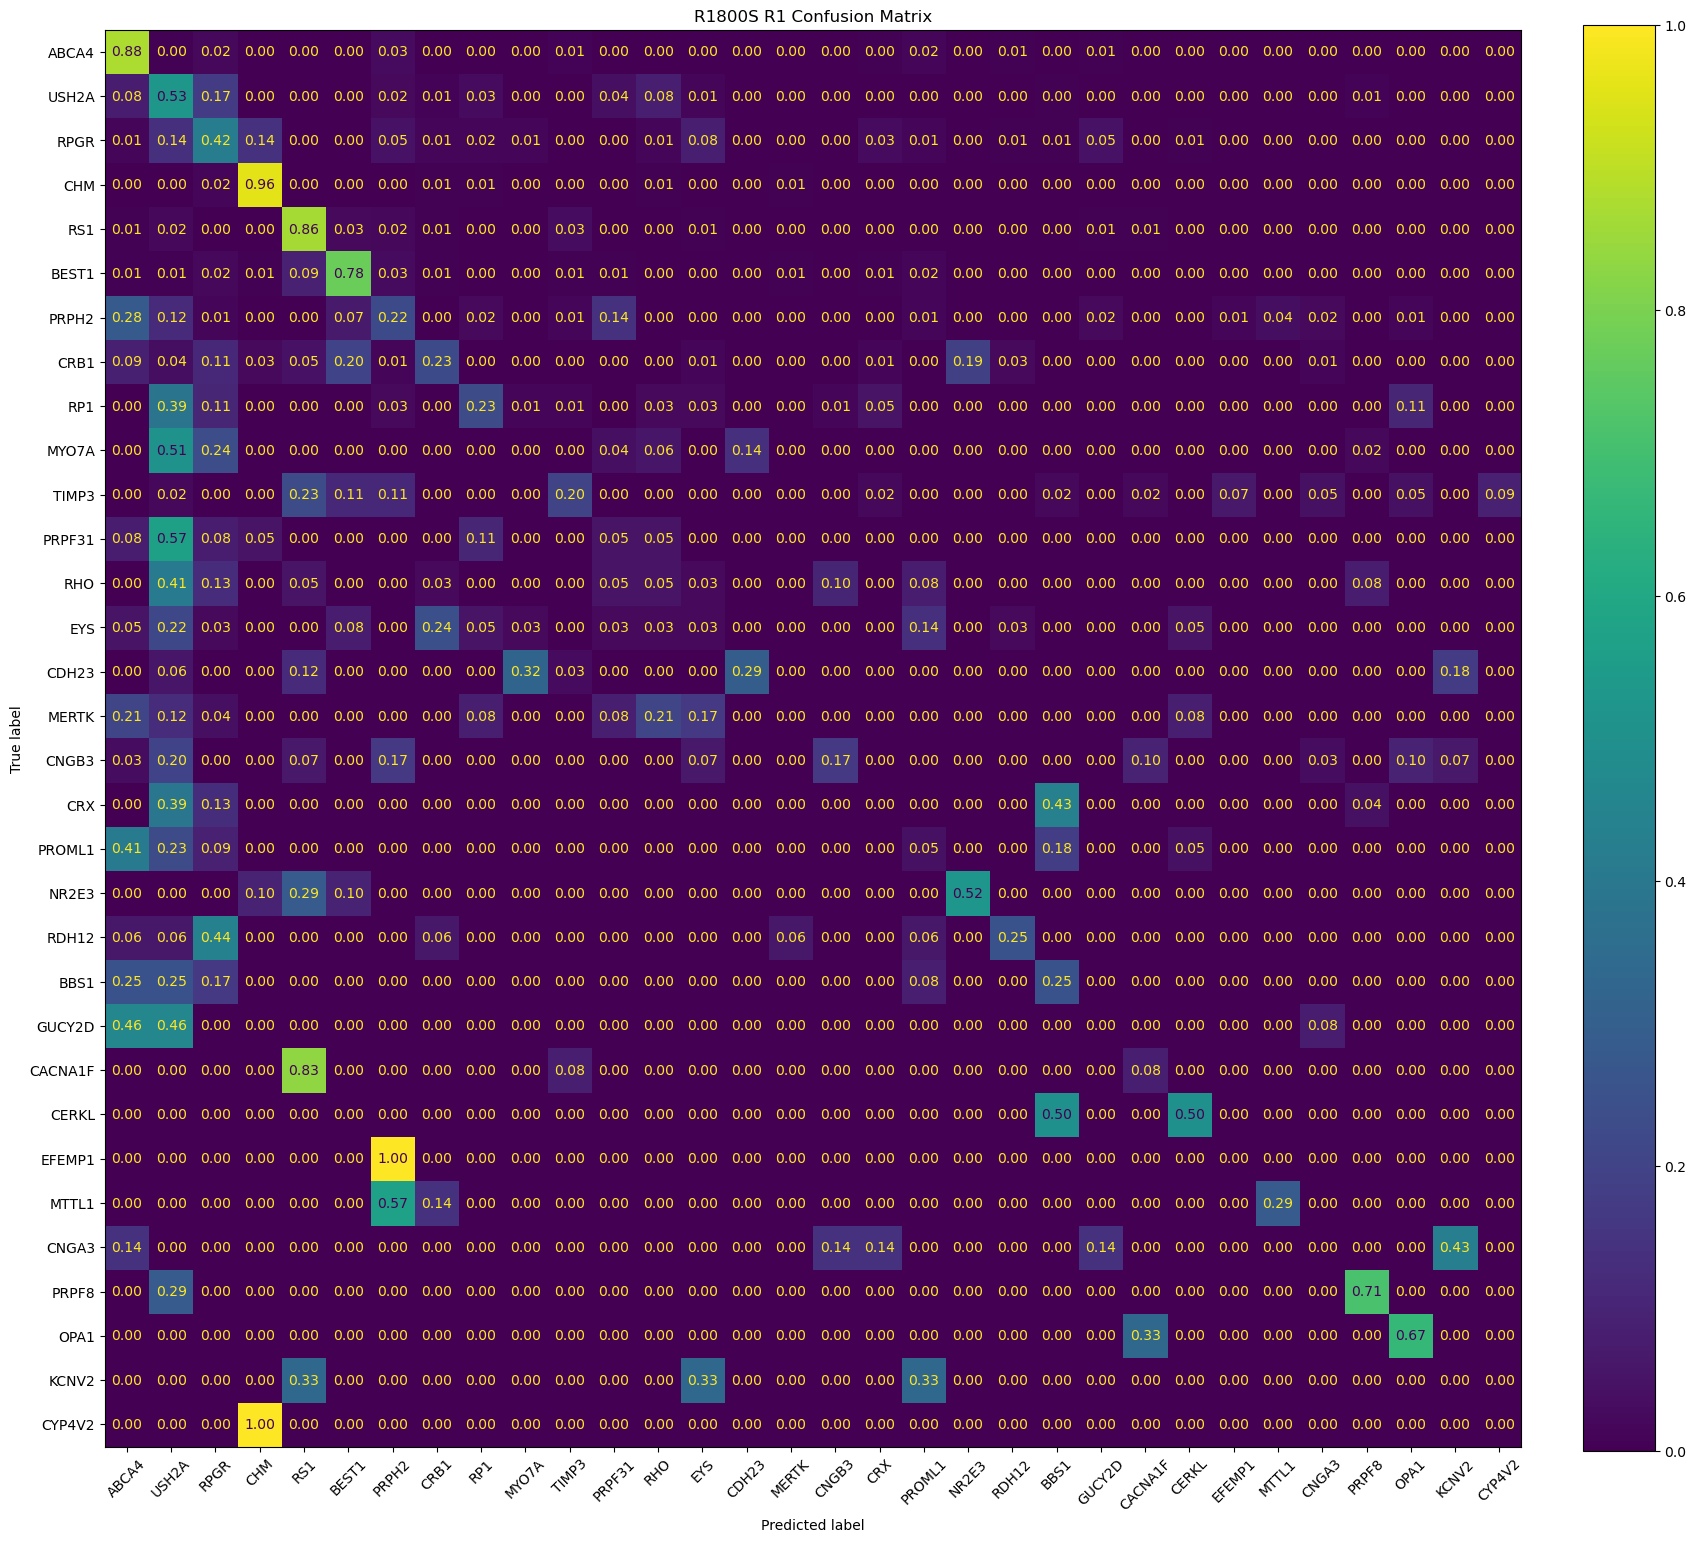

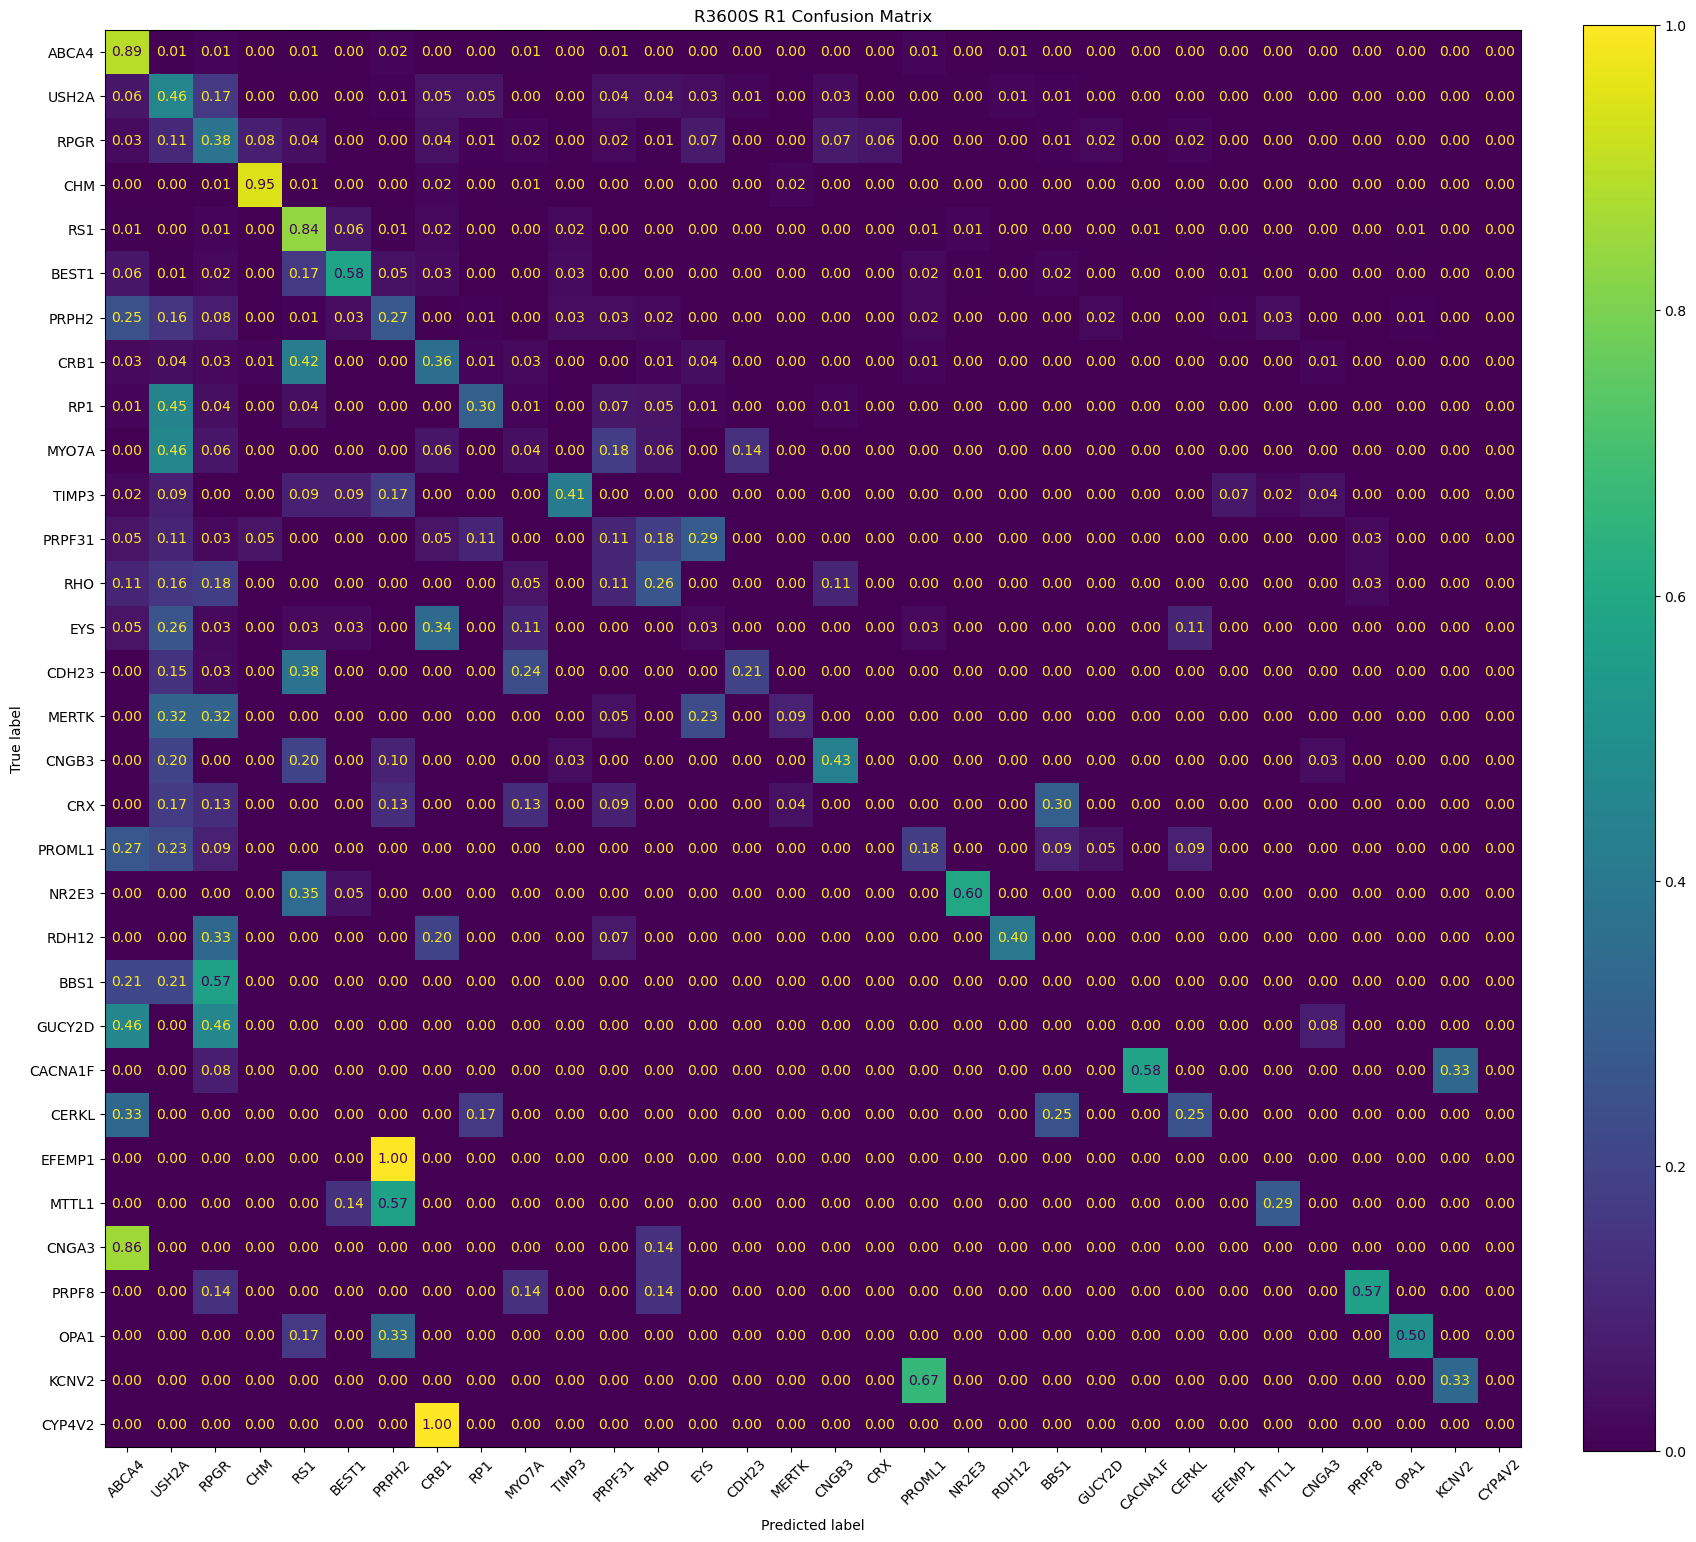

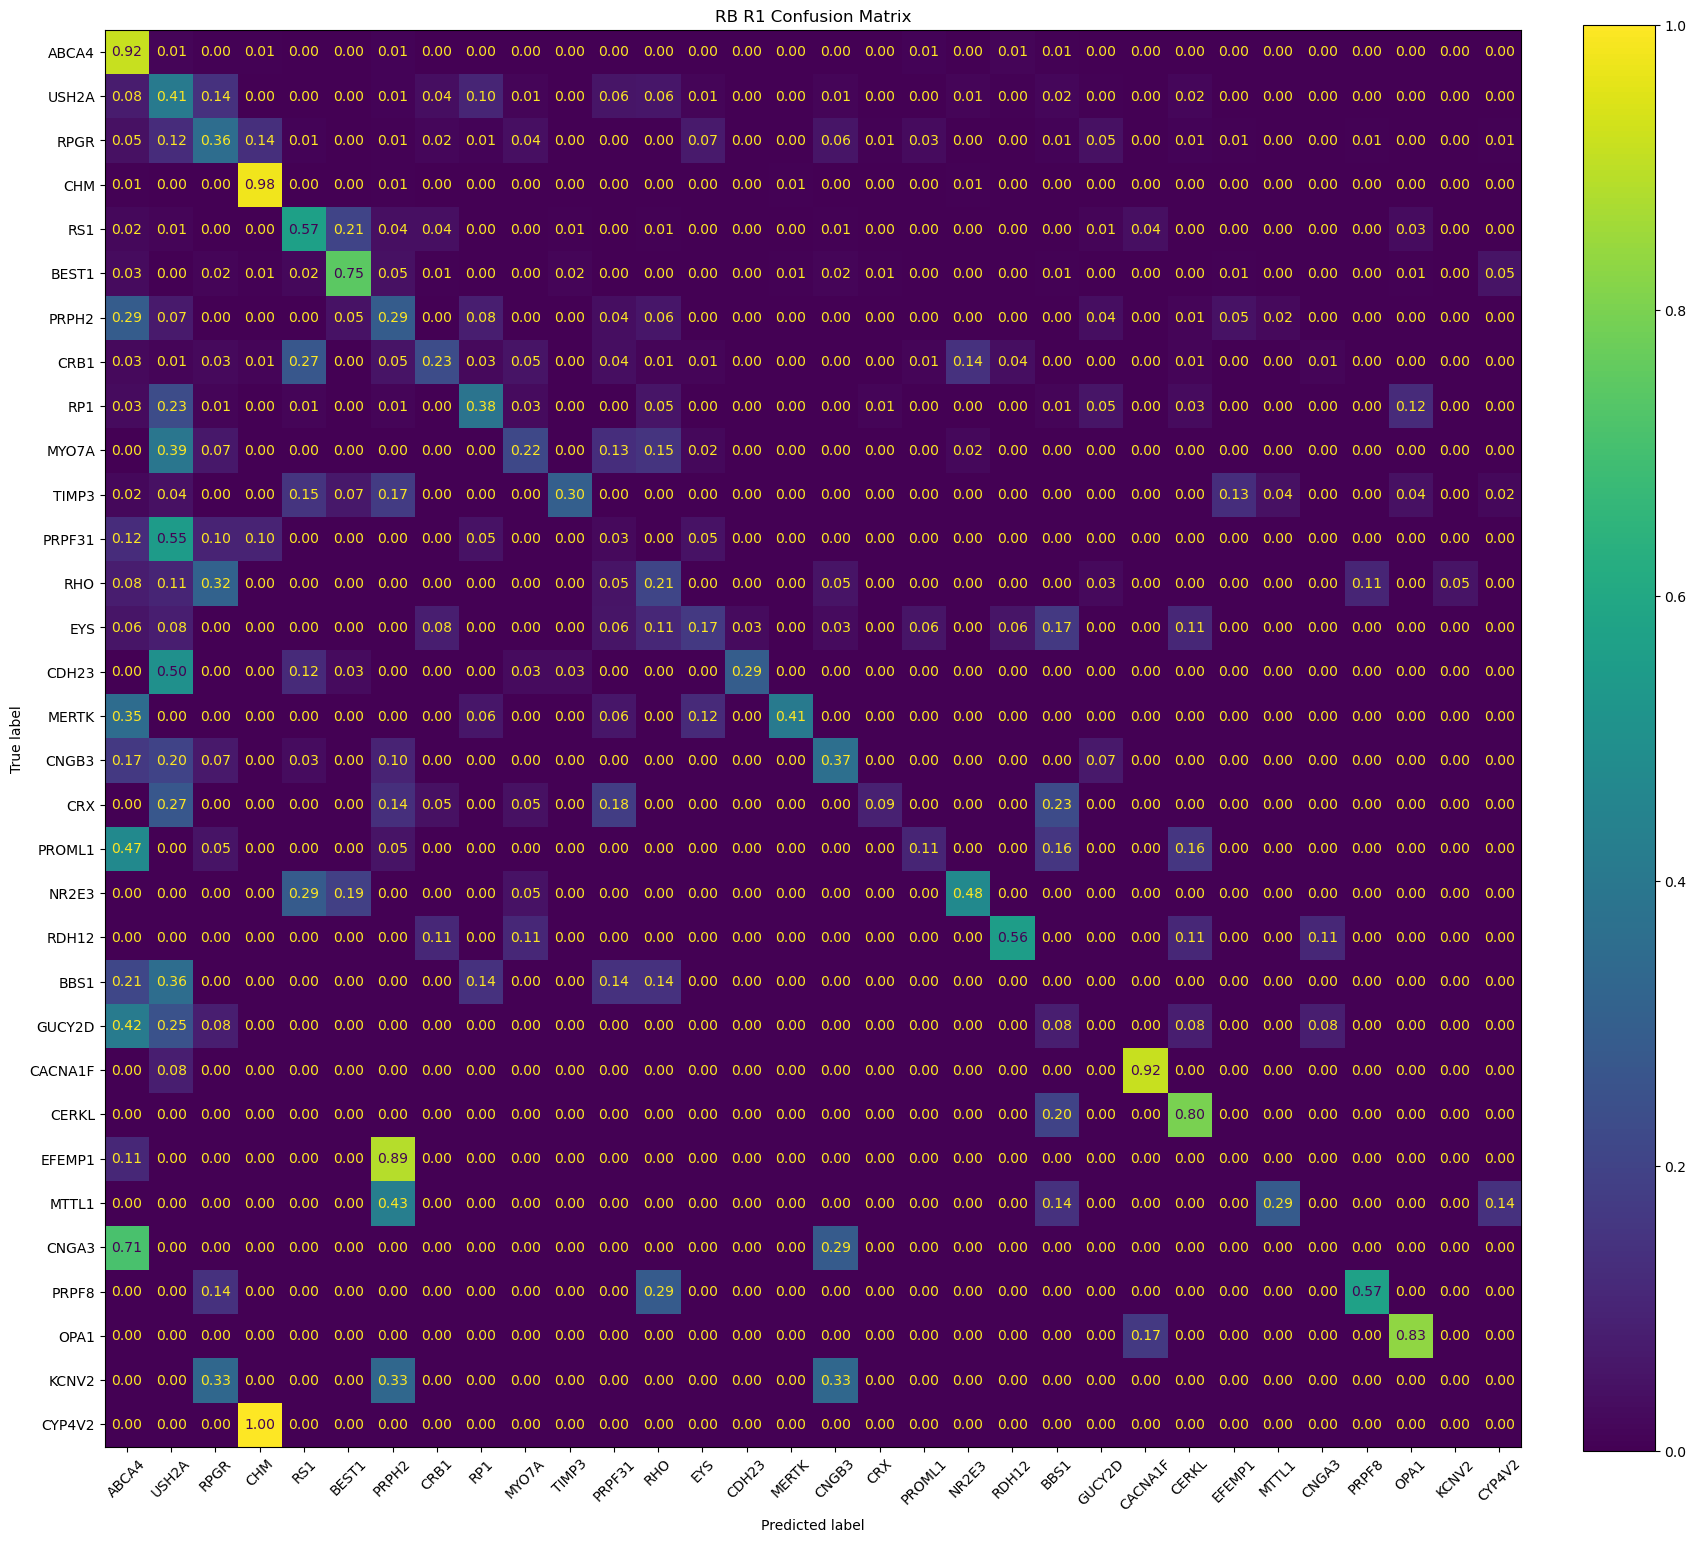

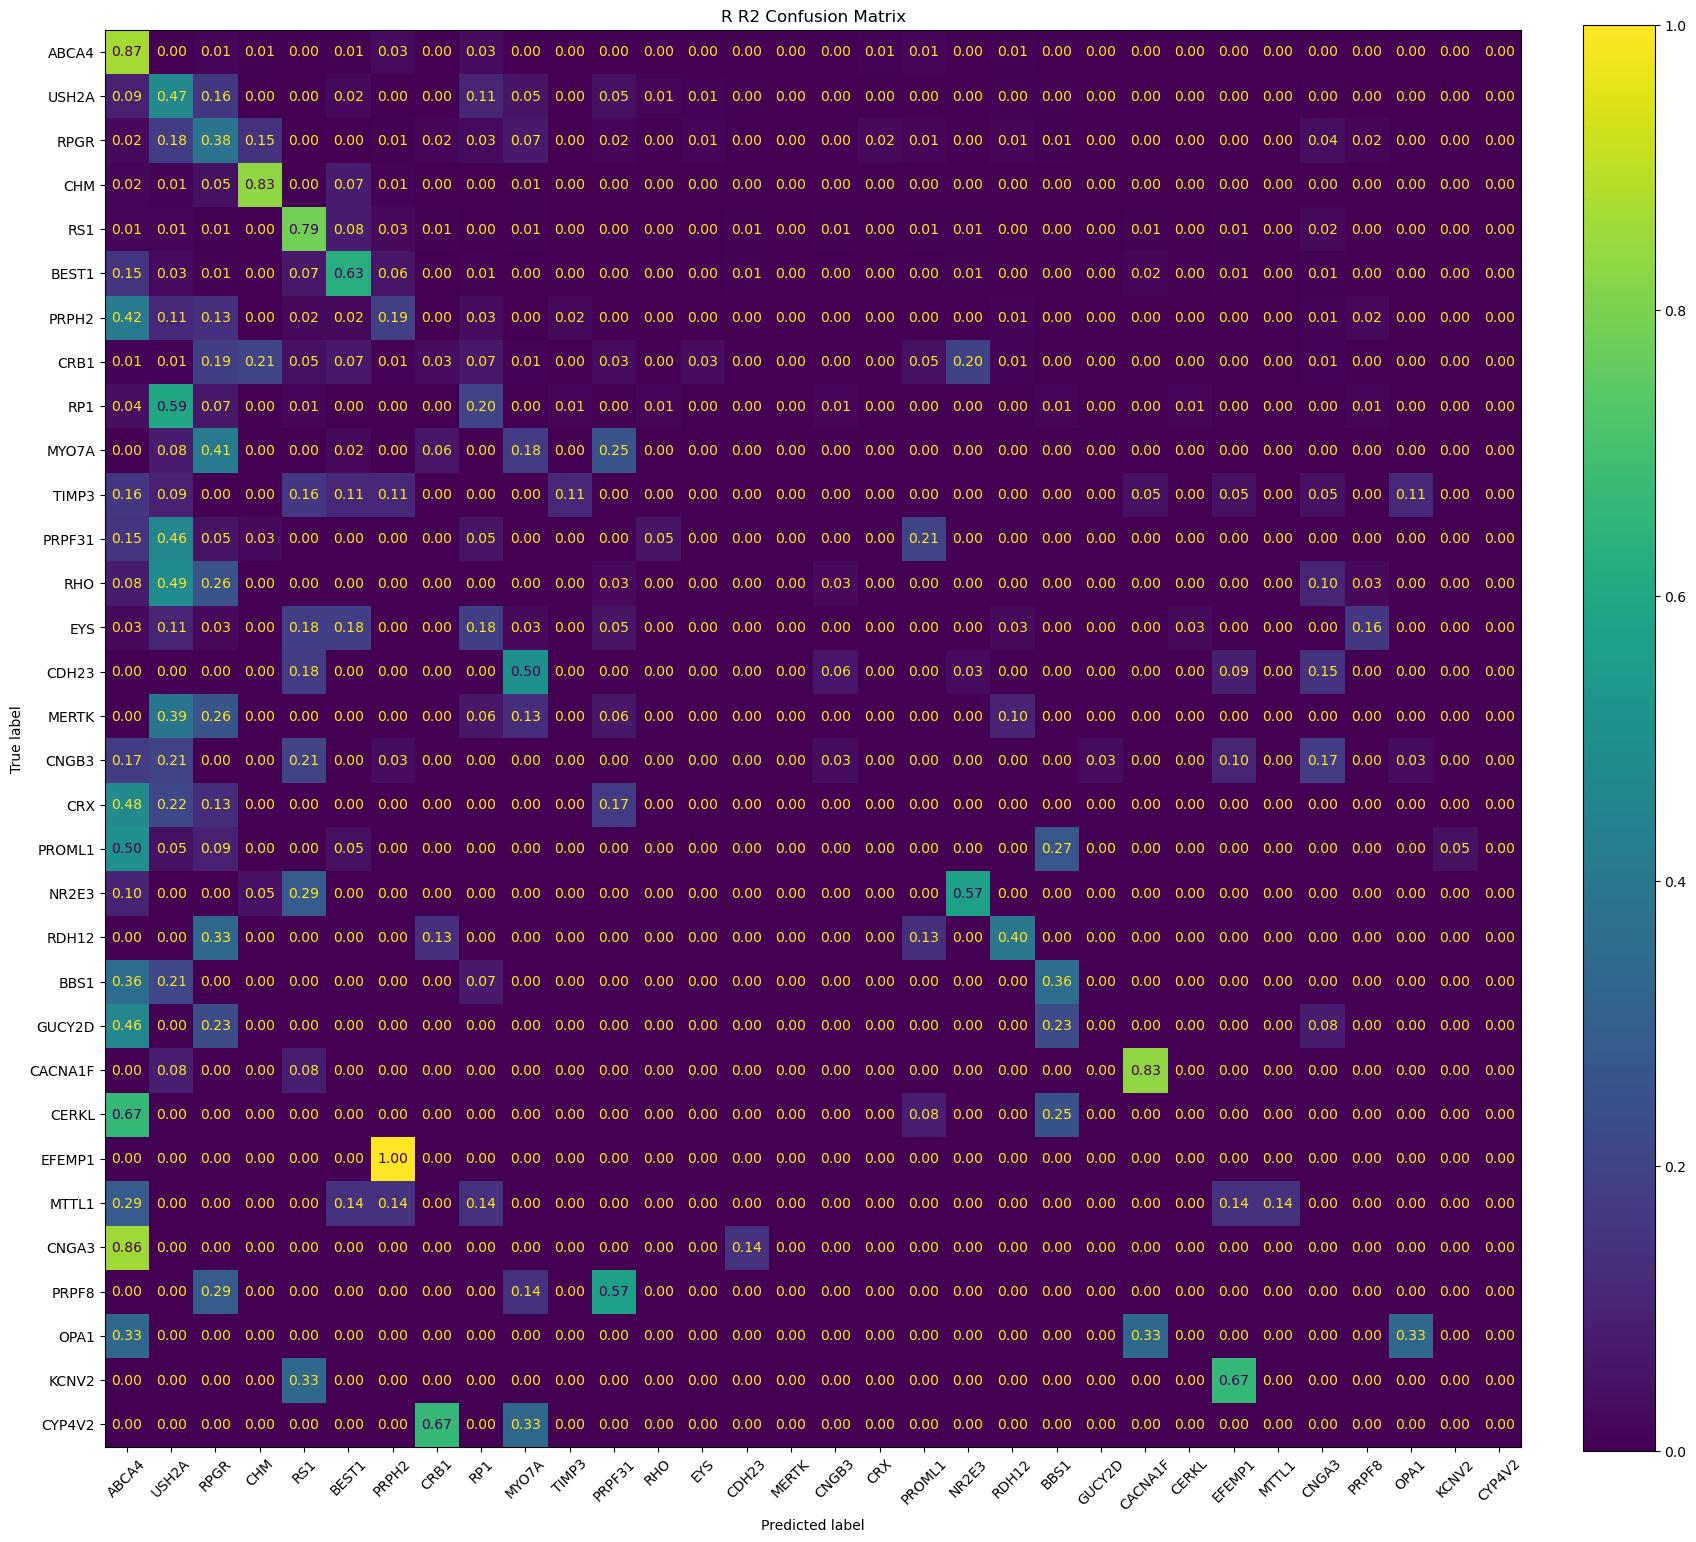

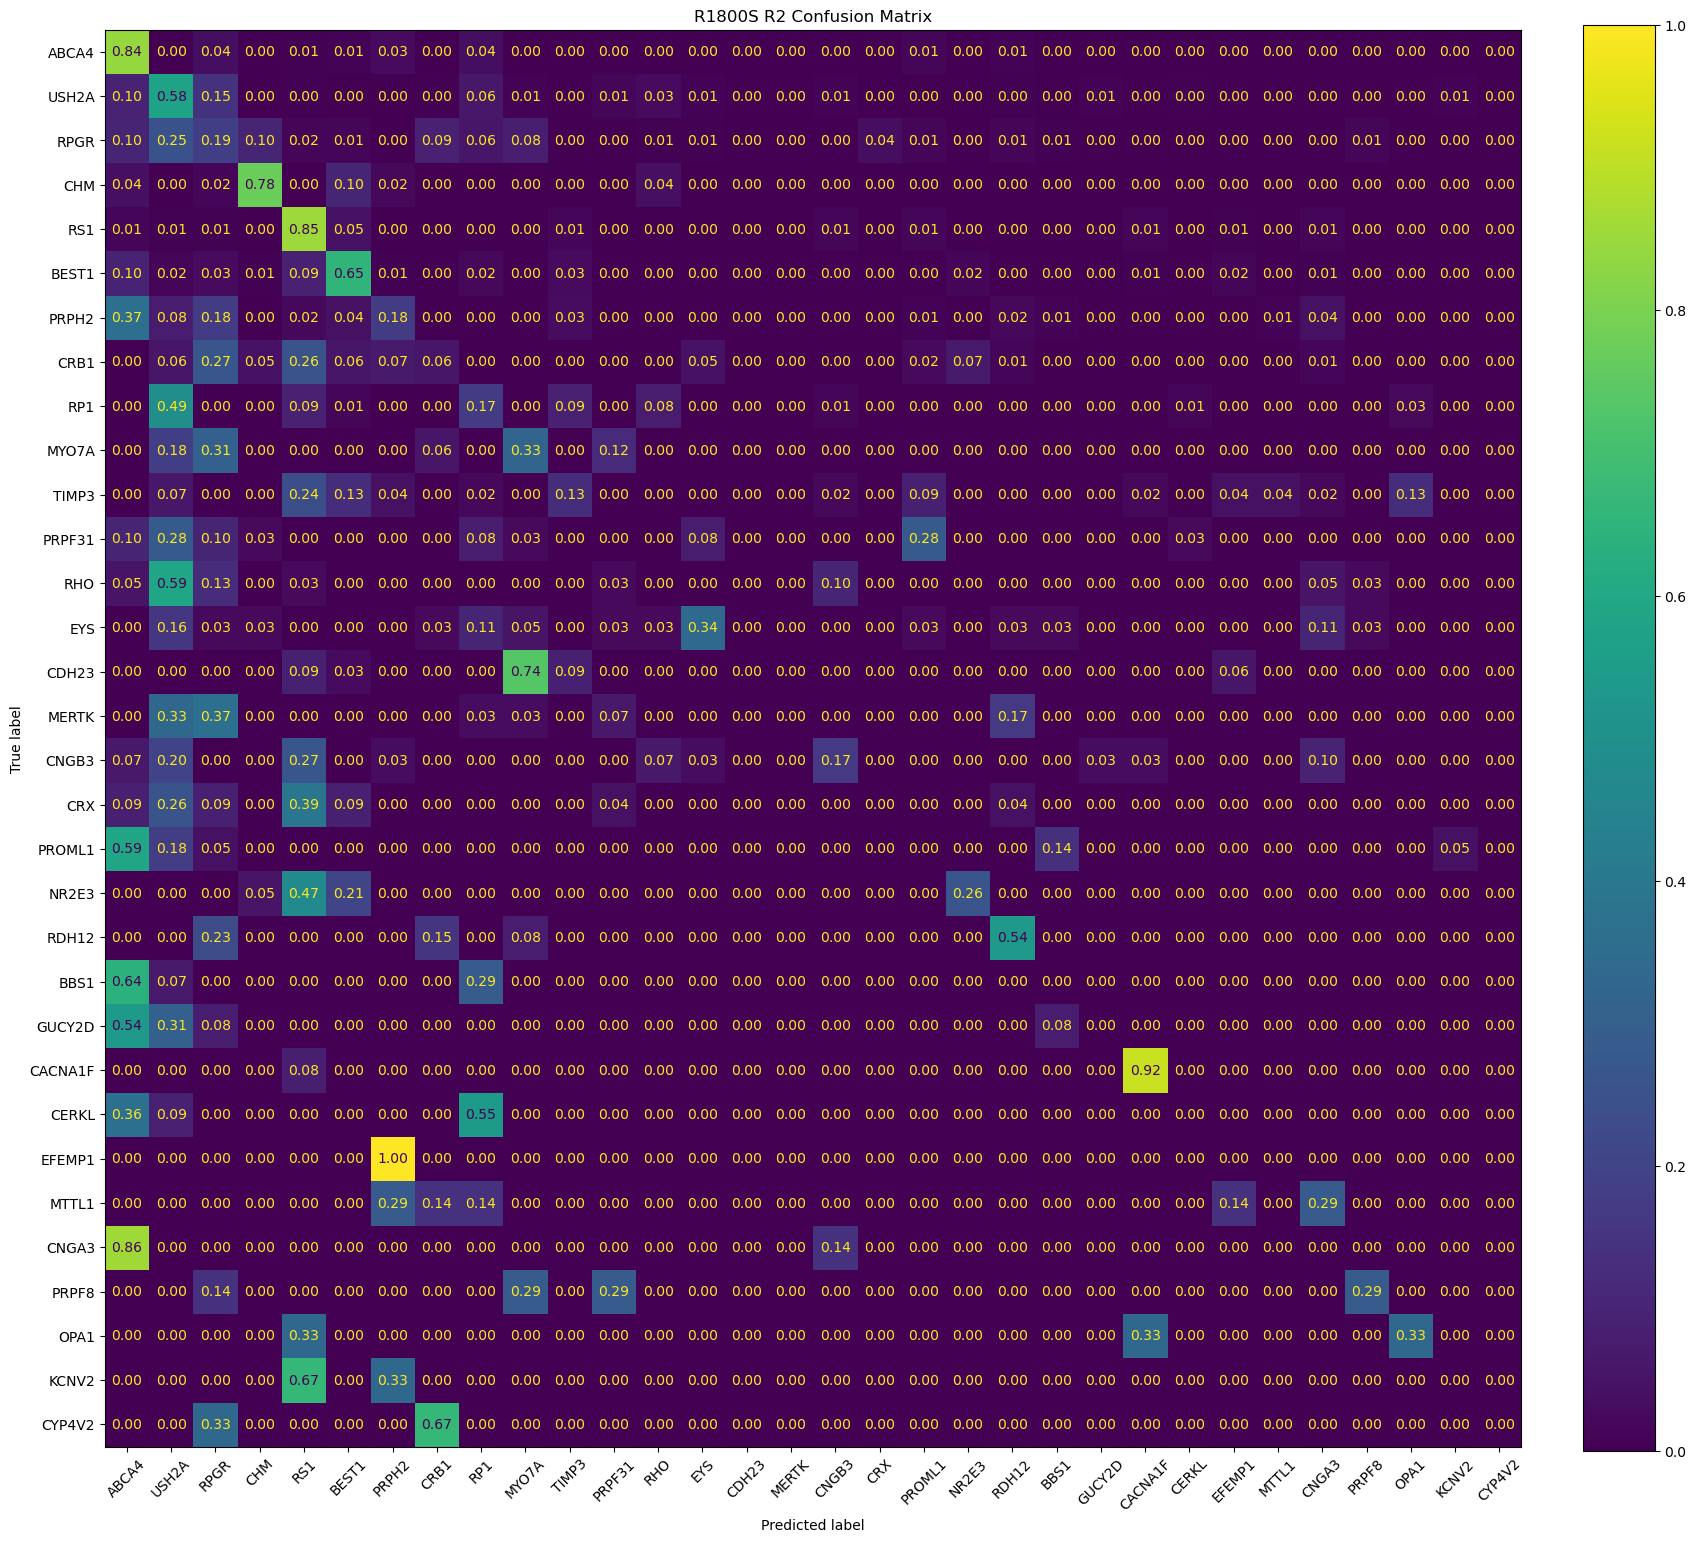

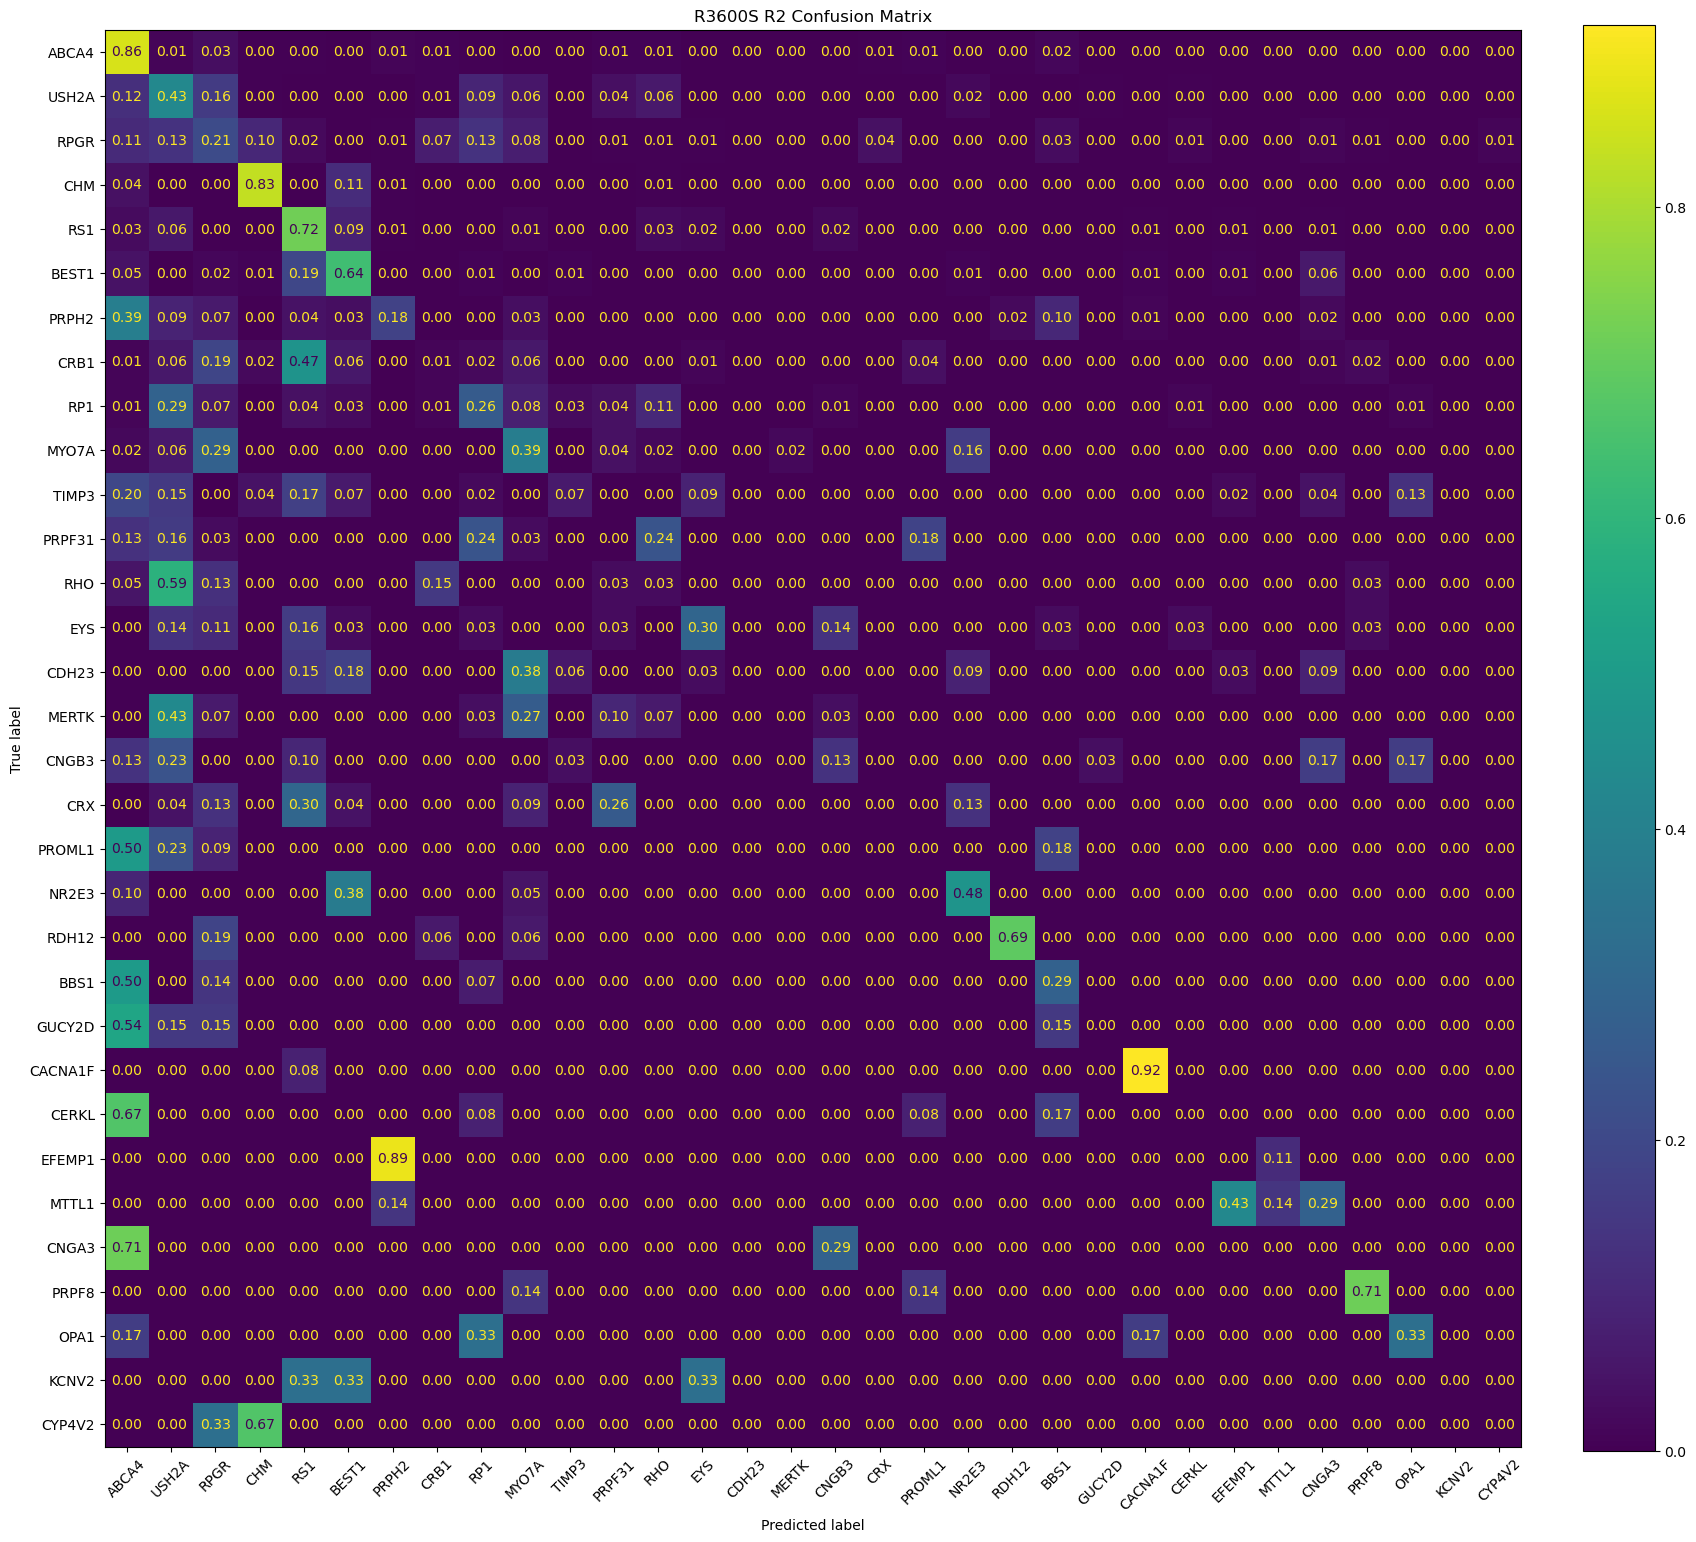

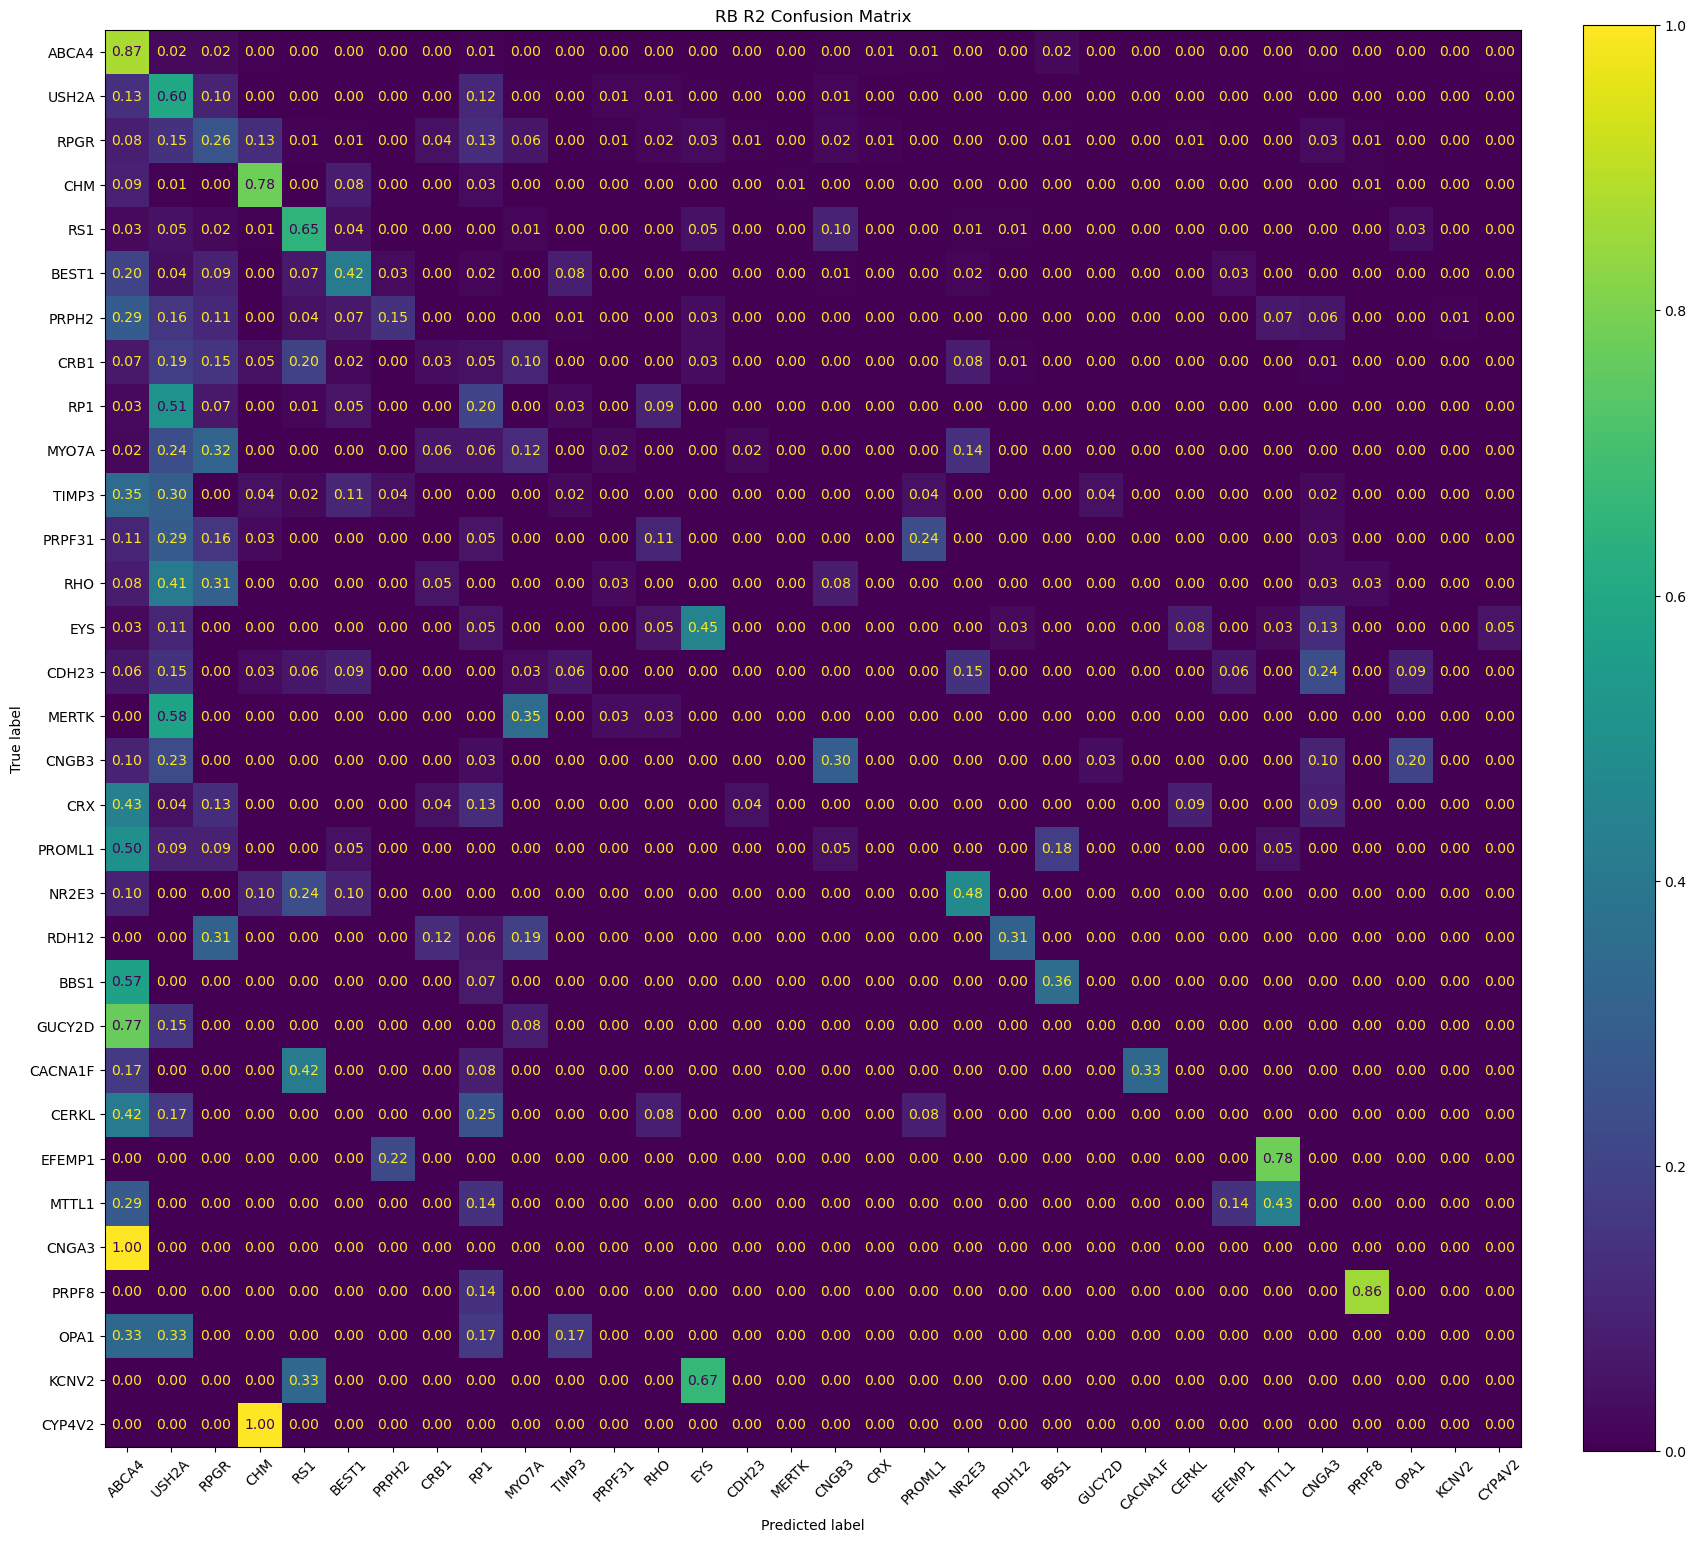

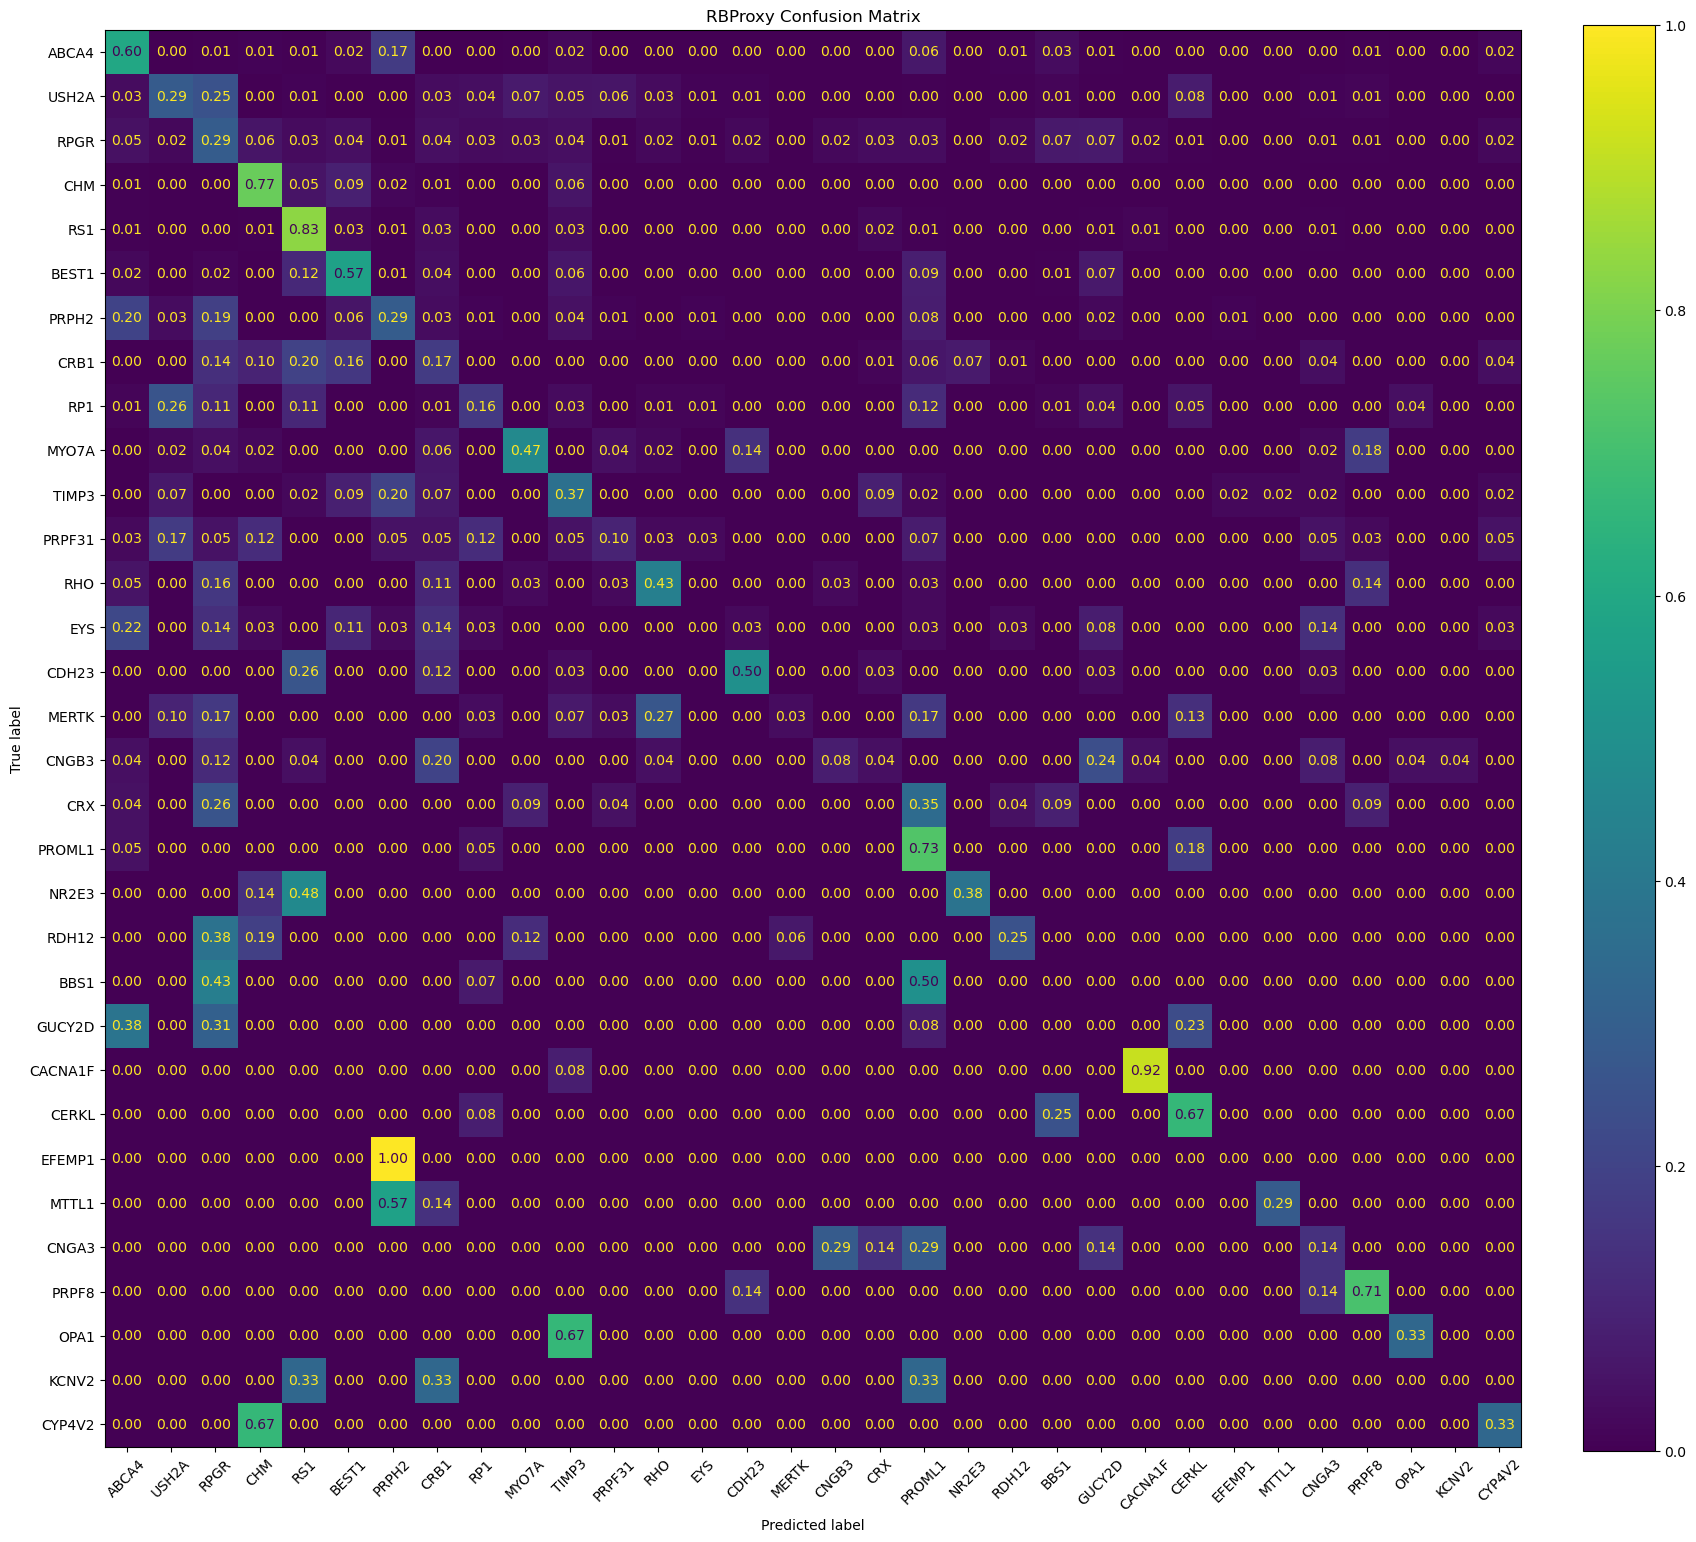

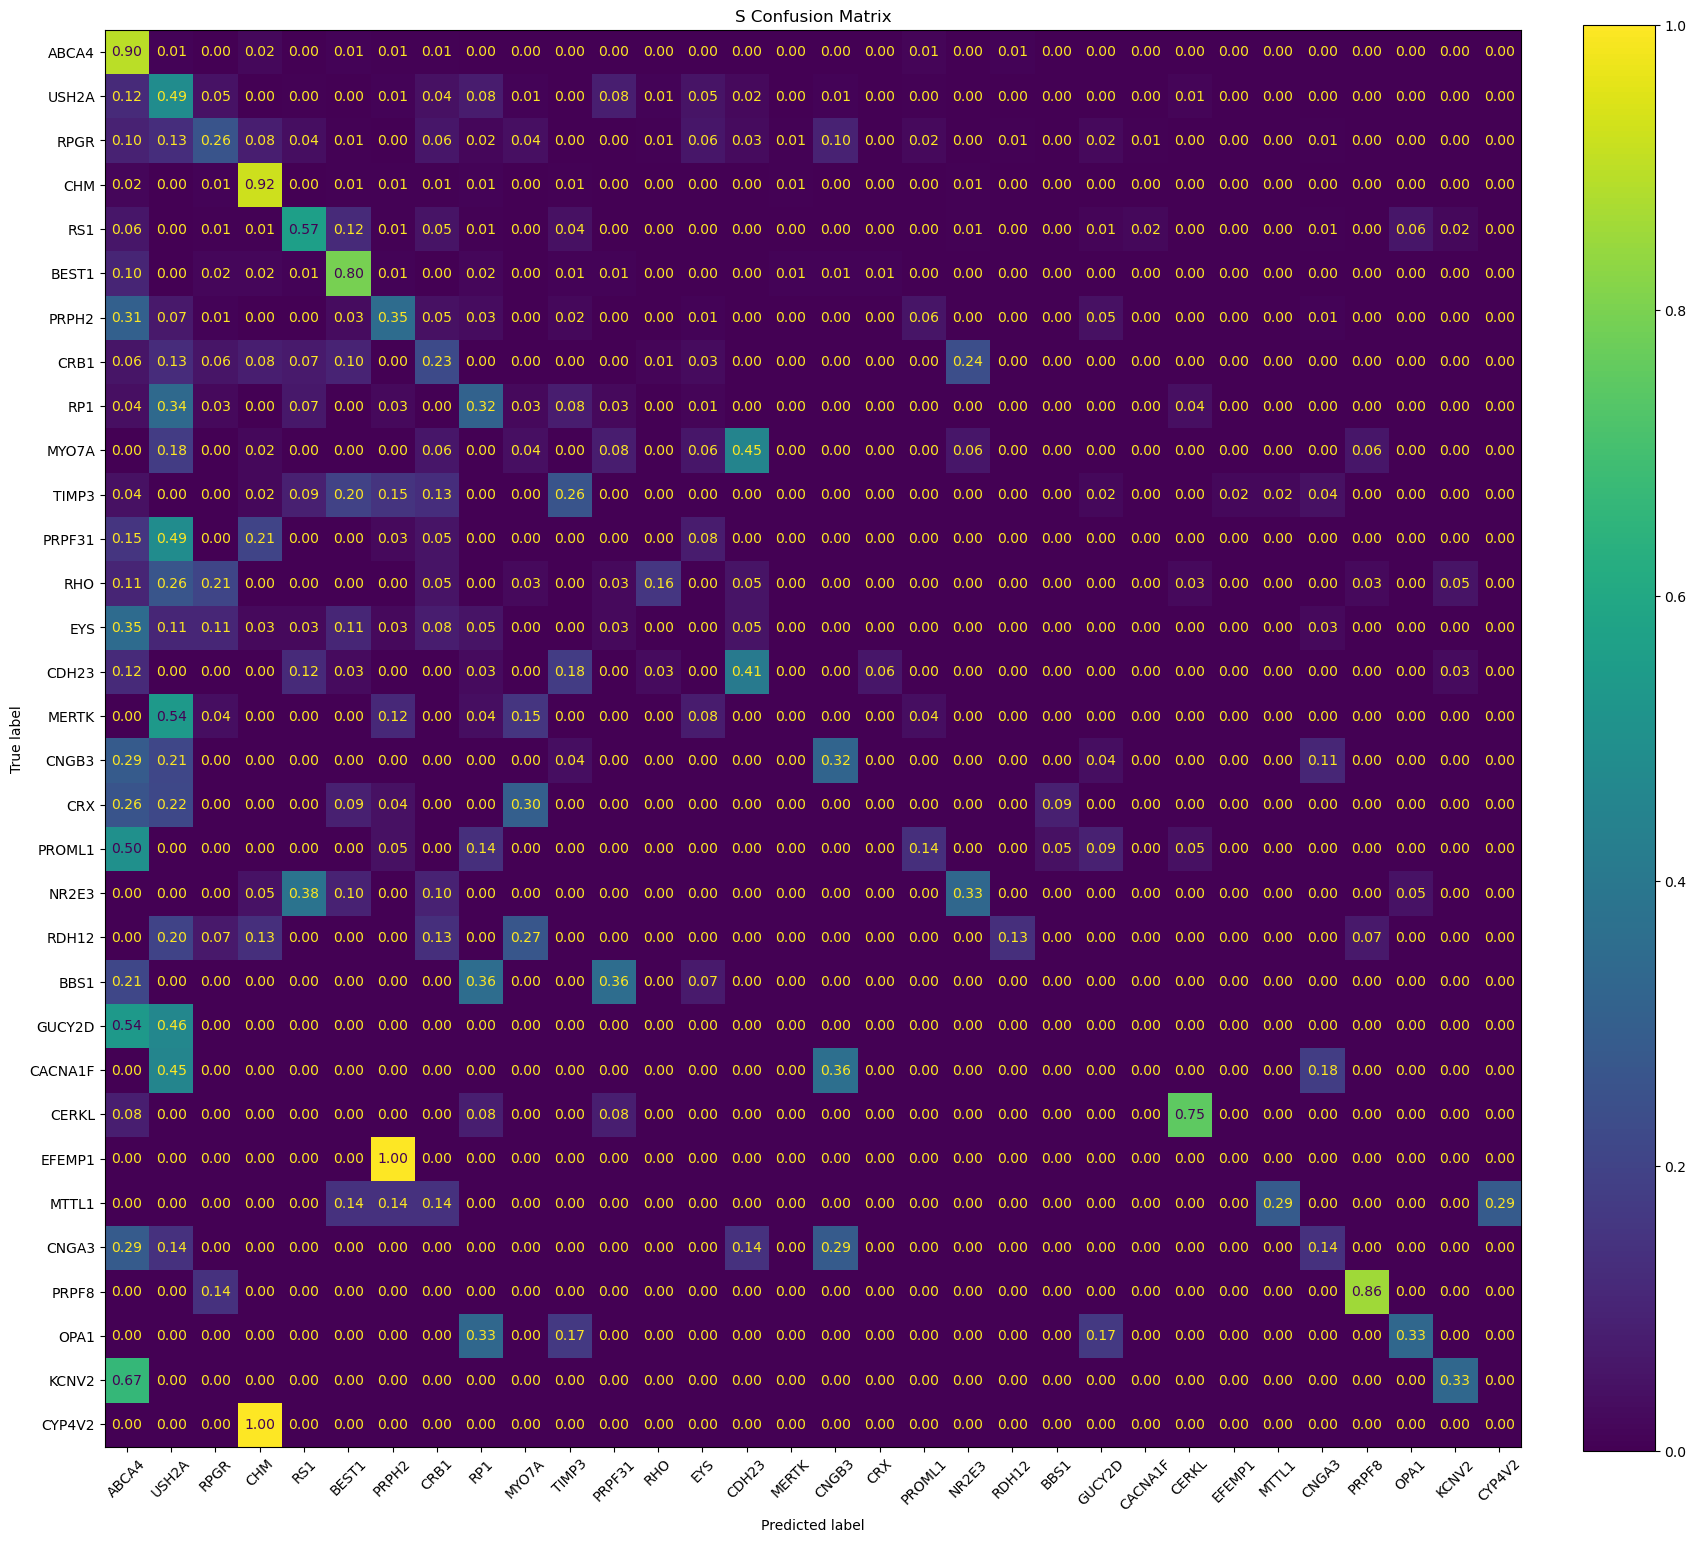

In [4]:
classes_ordering = list(preds_dict['R_r1']['True Class'].value_counts().keys()) 
cm_titles = [m.split('_')[0].upper() + ' ' + m.split('_')[1].upper() if '_' in m else m for m in preds_dict.keys()]
cm = {m: make_confusion_matrix(preds_dict[m], labels=classes_ordering, title=cm_titles[i] + ' Confusion Matrix', save=f'{m}_cm.png') for i, m in enumerate(preds_dict.keys())}

## Plot barplots of Predicted vs True Class Frequencies

In [ ]:
def make_barplot(cm, labels=None, title=None, normalize=True, order=None, save=None):
    ''' Plot barplots representing per-class prediction frequencies '''
    pred_freq = np.sum(cm, axis=0)
    true_freq = np.sum(cm, axis=1)
    
    if normalize:
        pred_freq = pred_freq / np.sum(pred_freq)
        true_freq = true_freq / np.sum(true_freq)
    
    pred_freq = pd.DataFrame(pred_freq, columns=['Frequency'])
    true_freq = pd.DataFrame(true_freq, columns=['Frequency'])
    pred_freq['Class'] = labels
    true_freq['Class'] = labels
    true_freq['Type'] = ['True']*len(true_freq)
    pred_freq['Type'] = ['Pred']*len(pred_freq)
    data = pd.concat([pred_freq, true_freq], axis=0)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x='Class', y='Frequency', hue='Type', order=order, hue_order=['True', 'Pred'])
    plt.xticks(rotation=45)
    plt.title(title)
    if save is not None:
        plt.savefig(save)
    plt.show()
    plt.close()

In [ ]:
classes_ordering = list(preds_dict['R_r1']['True Class'].value_counts().keys()) 
for m in cm.keys():
    title = m.split('_')[0].upper() + ' ' + m.split('_')[1].upper() if '_' in m else m
    make_barplot(cm[m], labels=classes, title='Predicted vs True Class Frequencies - ' + title, normalize=True, order=classes_ordering, save=f'{m}_frequencies.png')

## Visualize ROC curves

In [5]:
model_results = {}
classes_ordering = list(preds_dict['R_r1']['True Class'].value_counts().keys())
for m in preds_dict.keys():
#     cs = [cs for cs in classes if cs in preds_dict[m]['True Class'].unique()]
    auroc = AUROC(preds_dict[m], classes_ordering)
    model_results[m] = auroc(random_state=1399)

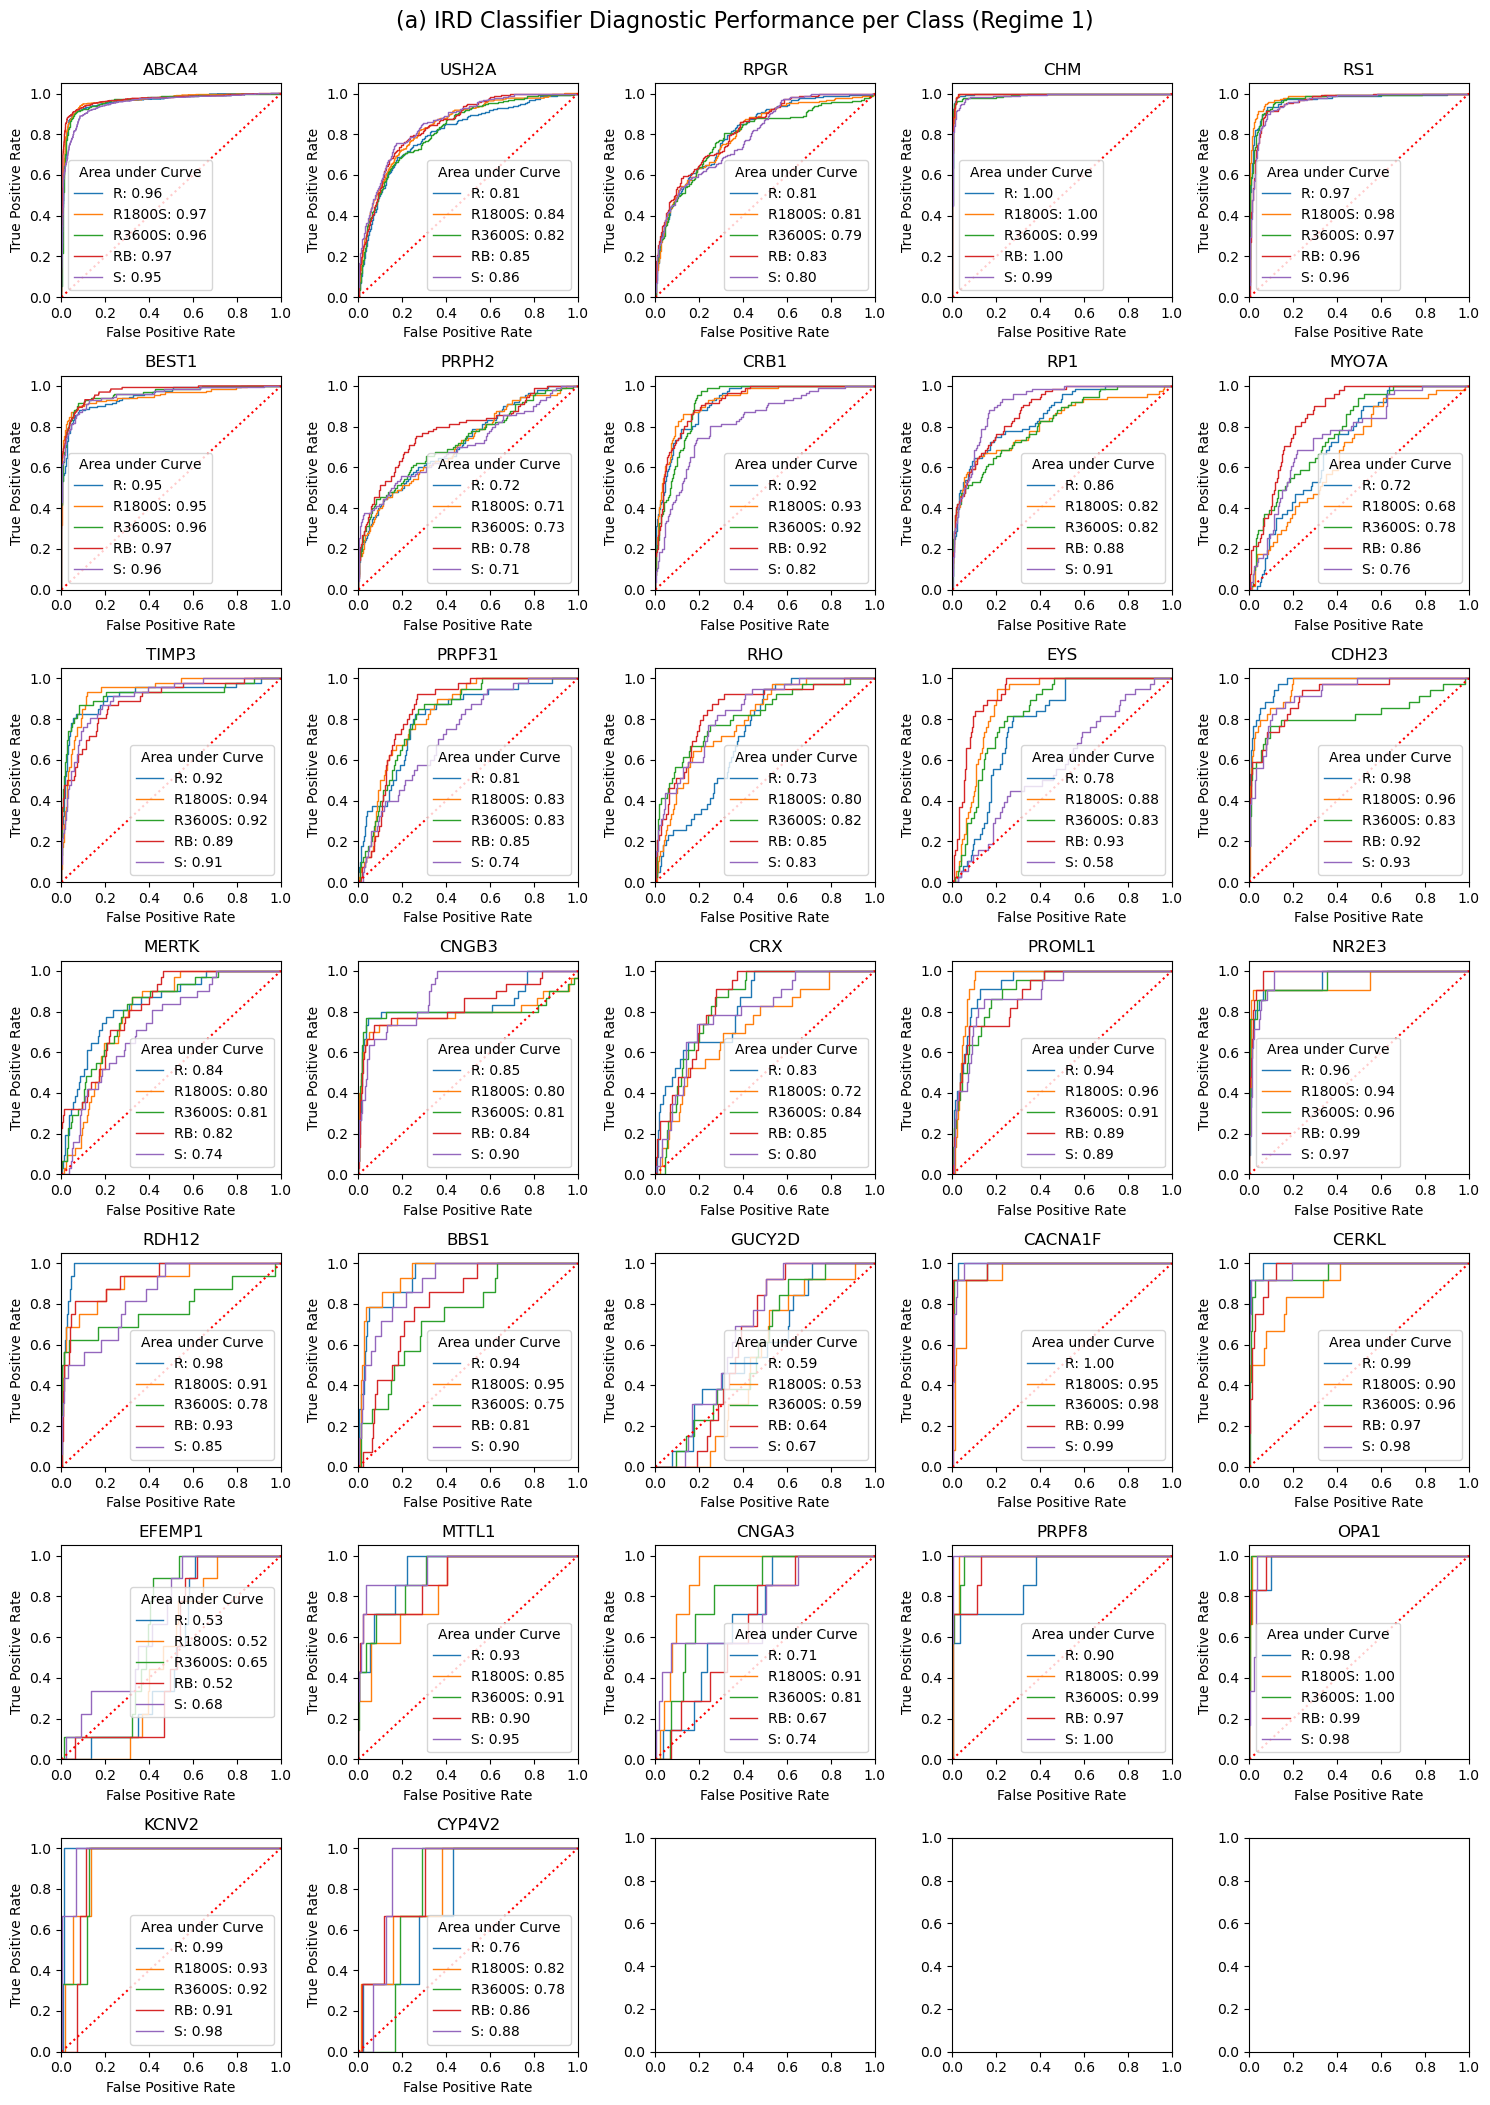

In [6]:
# plot roc regime 1 models
# labels = [cs for cs in classes if cs in preds_dict['R_r1']['True Class'].unique()]
labels = list(preds_dict['R_r1']['True Class'].value_counts().keys())
regime1_models = {k: preds_dict[k] for k in preds_dict.keys() if k.endswith('r1') or (k == 'S')}
plot_roc(7, 5, regime1_models, model_results, labels, '(a) IRD Classifier Diagnostic Performance per Class (Regime 1)')

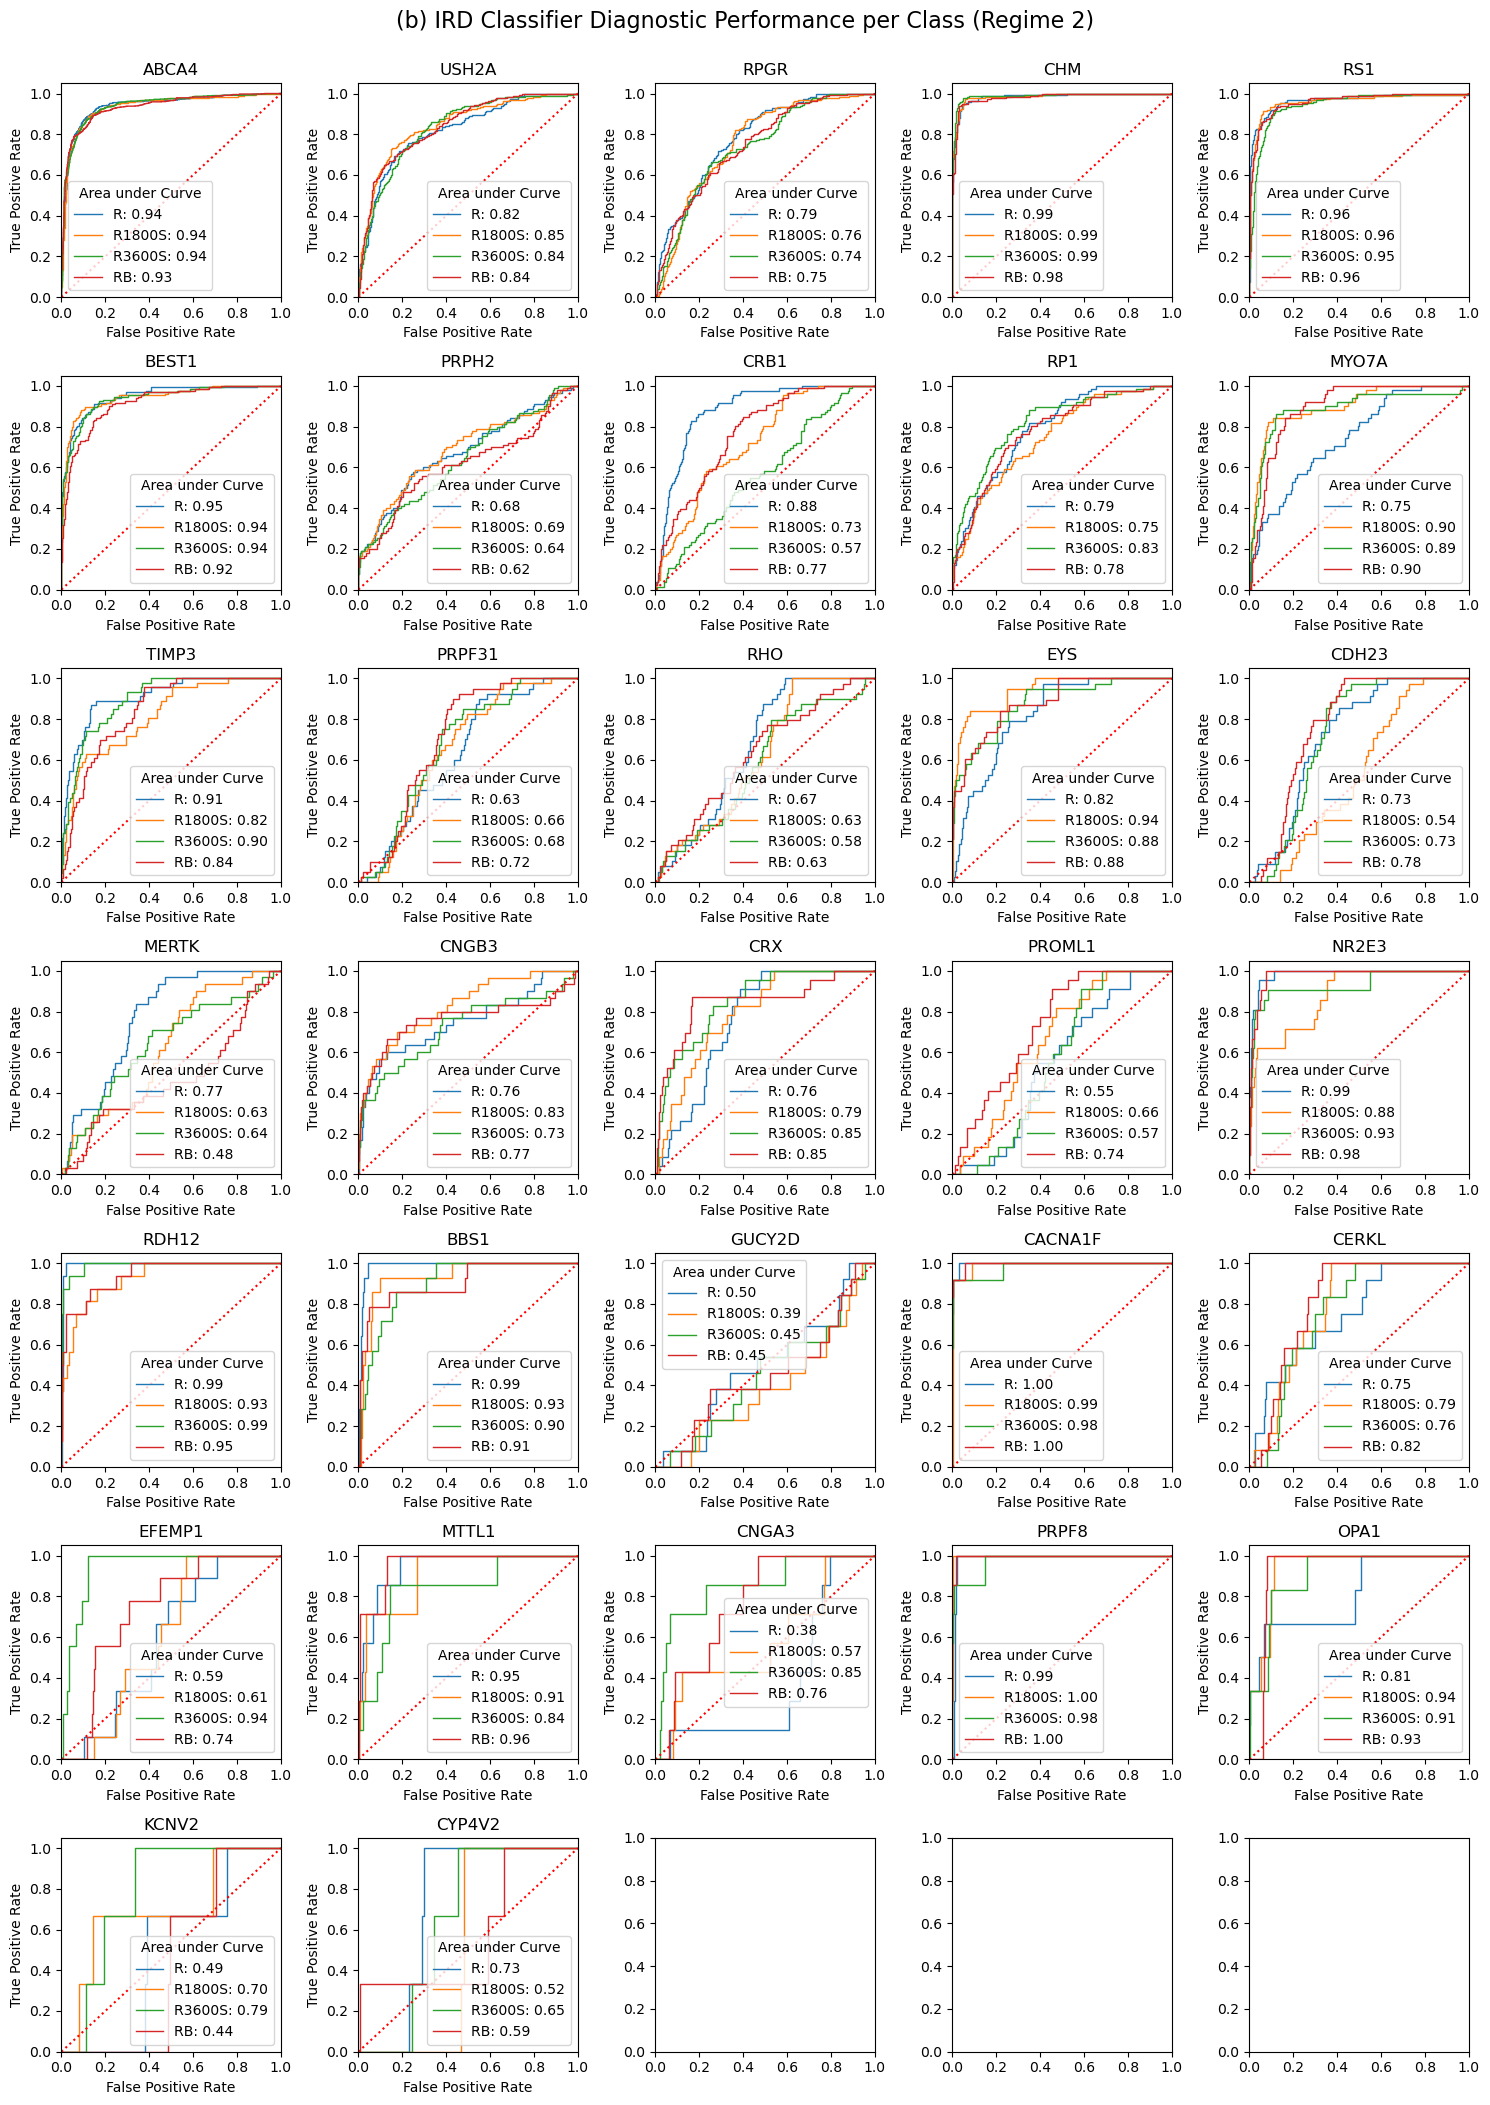

In [7]:
# plot roc regime 2 models
# labels = [cs for cs in classes if cs in preds_dict['R_r2']['True Class'].unique()]
labels = list(preds_dict['R_r1']['True Class'].value_counts().keys())
regime2_models = {k: preds_dict[k] for k in preds_dict.keys() if k.endswith('r2') or (k == 'RB2')}
plot_roc(7, 5, regime2_models, model_results, labels, '(b) IRD Classifier Diagnostic Performance per Class (Regime 2)')

## Create summary table of AUCs per class

In [8]:
# create df of aucs for each model
aucs_per_model = pd.DataFrame(columns=['Class', *model_results.keys()])
for m in model_results.keys():
    aucs_df = model_results[m][0]
    aucs_per_model[m] = aucs_df['auroc']
aucs_per_model['Class'] = aucs_df['Class']
aucs_per_model

,Class,R_r1,R1800S_r1,R3600S_r1,RB_r1,R_r2,R1800S_r2,R3600S_r2,RB_r2,RBProxy,S
0,ABCA4,0.961144,0.965577,0.963800,0.968688,0.938388,0.936546,0.937645,0.933461,0.914937,0.950756
1,USH2A,0.808794,0.839767,0.823205,0.849735,0.824951,0.848595,0.835720,0.844015,0.892532,0.858564
2,RPGR,0.814970,0.806166,0.792491,0.825316,0.785918,0.763617,0.744891,0.752101,0.786307,0.797729
3,CHM,0.997801,0.997588,0.991351,0.998219,0.985730,0.986061,0.989973,0.982228,0.981537,0.989617
4,RS1,0.967805,0.981109,0.970764,0.961432,0.964990,0.961265,0.946013,0.962123,0.972418,0.959493
5,BEST1,0.949408,0.951911,0.963277,0.971951,0.947478,0.944710,0.940885,0.915572,0.933323,0.956275
6,PRPH2,0.721359,0.712826,0.726546,0.783094,0.677073,0.687274,0.643305,0.618414,0.714288,0.707247
7,CRB1,0.922539,0.927236,0.920270,0.921840,0.884597,0.727151,0.574500,0.772589,0.847365,0.819575
8,RP1,0.857092,0.816160,0.818389,0.883714,0.794263,0.753046,0.825124,0.783855,0.890498,0.914198
9,MYO7A,0.723966,0.679805,0.784403,0.864537,0.749524,0.904923,0.890020,0.897902,0.964785,0.760647


In [ ]:
# aucs_per_model = aucs_per_model.rename(columns={'RB2': 'RBProxy'})
# aucs_per_model.to_csv('model_aucs.csv')

In [9]:
def wilcoxon_test(sample1, sample2):
    from scipy.stats import wilcoxon
    stat, pval = wilcoxon(sample1, sample2)
    return (stat, pval)

In [10]:
wilcoxon_test(aucs_per_model['R_r1'], aucs_per_model['R1800S_r1'])

(233.0, 0.5621391110725872)

In [11]:
wilcoxon_test(aucs_per_model['R_r1'], aucs_per_model['R3600S_r1'])

(252.0, 0.8224559693191273)

In [12]:
wilcoxon_test(aucs_per_model['R_r1'], aucs_per_model['RB_r1'])

(224.0, 0.45448573750615706)

In [13]:
wilcoxon_test(aucs_per_model['R_r2'], aucs_per_model['R1800S_r2'])

(246.0, 0.7364328441559214)

In [14]:
wilcoxon_test(aucs_per_model['R_r2'], aucs_per_model['R3600S_r2'])

(253.0, 0.8370343688651636)

In [15]:
wilcoxon_test(aucs_per_model['R_r2'], aucs_per_model['RB_r2'])

(249.0, 0.7791061247608694)

In [17]:
wilcoxon_test(aucs_per_model['R_r2'], aucs_per_model['RBProxy'])

(111.0, 0.00422389926927937)

In [18]:
wilcoxon_test(aucs_per_model['R_r1'], aucs_per_model['S'])

(256.0, 0.8810869002194571)

# Analyse test set with one image per patient

In [ ]:
# selects only one image per patient
def one_image_per_patient(df):
    np.random.seed(1399)
    new_df = pd.DataFrame(columns=df.columns)
    for pat, pat_df in df.groupby('patient.number'):
        random_pat = pat_df.sample()
        new_df = pd.concat([new_df, random_pat], axis=0, ignore_index=True)
    return new_df

In [ ]:
# get predictions for all trained models
all_csvs = [path for path in os.listdir('.') if path.endswith('.csv')]
model_dfs = [get_predictions(m + '.csv', classes=pandas_query, apply=one_image_per_patient) for m in model_names]
preds_dict = {k: v for k, v in zip(model_names, model_dfs)}

In [ ]:
# plot confusion matrices for all models
classes_ordering = list(preds_dict['R_r1']['True Class'].value_counts().keys()) 
cm_titles = [m.split('_')[0].upper() + ' ' + m.split('_')[1].upper() if '_' in m else m for m in preds_dict.keys()]
cm = {m: make_confusion_matrix(preds_dict[m], labels=classes_ordering, title=cm_titles[i] + ' Confusion Matrix', save=f'{m}_cm.png') for i, m in enumerate(preds_dict.keys())}

In [ ]:
# plot roc curves
model_results_one_img_per_pat = {}
classes_ordering = list(preds_dict['R_r1']['True Class'].value_counts().keys())
for m in preds_dict.keys():
#     cs = [cs for cs in classes if cs in preds_dict[m]['True Class'].unique()]
    auroc = AUROC(preds_dict[m], classes_ordering)
    model_results_one_img_per_pat[m] = auroc(random_state=1399)

In [ ]:
# plot roc regime 1 models
# labels = [cs for cs in classes if cs in preds_dict['R_r1']['True Class'].unique()]
labels = list(preds_dict['R_r1']['True Class'].value_counts().keys())
regime1_models = {k: preds_dict[k] for k in preds_dict.keys() if k.endswith('r1') or (k == 'S')}
plot_roc(7, 5, regime1_models, model_results_one_img_per_pat, labels, '(a) IRD Classifier Diagnostic Performance per Class (Regime 1)')

In [ ]:
# plot roc regime 2 models
# labels = [cs for cs in classes if cs in preds_dict['R_r2']['True Class'].unique()]
labels = list(preds_dict['R_r1']['True Class'].value_counts().keys())
regime2_models = {k: preds_dict[k] for k in preds_dict.keys() if k.endswith('r2') or (k == 'RB2')}
plot_roc(7, 5, regime2_models, model_results_one_img_per_pat, labels, '(b) IRD Classifier Diagnostic Performance per Class (Regime 2)')

In [ ]:
# create df of aucs for each model
aucs_per_model = pd.DataFrame(columns=['Class', *model_results_one_img_per_pat.keys()])
for m in model_results_one_img_per_pat.keys():
    aucs_df = model_results_one_img_per_pat[m][0]
    aucs_per_model[m] = aucs_df['auroc']
aucs_per_model['Class'] = aucs_df['Class']
aucs_per_model